## Exploratory analysis

En el siguiente apartado apliqué un análisis exploratorio para determinar datos como la pelicula con mayor ganancia, el promedio de ganancias de ese año, el numero de peliculas por genero del año y el género con mas ganancias por año, así como su promedio. Cabe mencionar que el número de peliculas por año contenidas en cada tabla esta por debajo de las 200 (y por encima de las 160) debido a los diversos filtros que apliqué anteriormente.

In the following section, I conducted an exploratory analysis to determine information such as the movie with the highest earnings, the average earnings for that year, the number of movies per genre for the year, and the genre with the highest earnings per year, along with its average. It's worth mentioning that the number of movies per year in each table is below 200 (and above 160) due to the various filters I applied earlier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gen = pd.read_csv('updated_data/genres.csv')
dis = pd.read_csv('updated_data/distributors.csv')
dat = {'Year': [],'Genre': [],'Total Genre Gross': []}
resume_table = pd.DataFrame(dat)

Empezando por el año 2000 voy a visualizar el conteo de peliculas de acuerdo a las ganancias generadas.

Starting from the year 2000, I will visualize the count of movies according to the generated earnings.

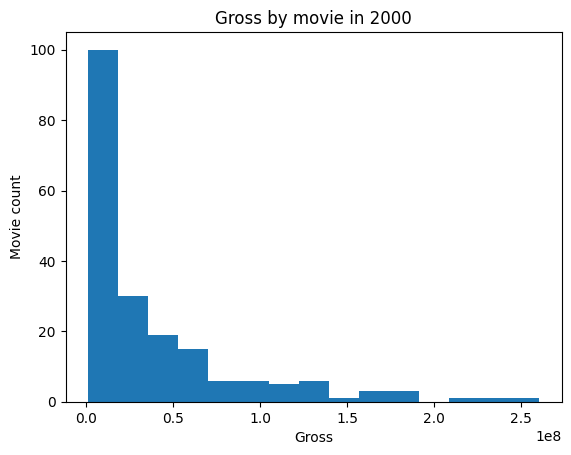

In [2]:
index2000 = pd.read_csv('updated_data/index2000.csv')

def table_mov_vs_gross(df,y):
    plt.hist(df['Gross'], bins=15)
    plt.xlabel('Gross')
    plt.ylabel('Movie count')
    plt.title(f'Gross by movie in {y}')
    plt.show()

table_mov_vs_gross(index2000,2000)

En la gráfica anterior podemos apreciar que practicamente más de la mitad de las peliculas esta por debajo de las ganancias de 50 millones de dólares, a continuacion presento los datos.

In the previous graph, we can observe that practically more than half of the movies are below earnings of 50 million dollars. Below, I present the data.

In [3]:
def get_info(df,y):
    media = df['Gross'].mean()
    print (f'The average earnings of the year',y,'is',round(media,2),'dollars')
    registrosdebajo = df[df['Gross'] < media]
    porcentaje = (len(registrosdebajo) / len(df)) * 100
    print (f'The percentage of movies from the year',y,'with earnings lower than the average is',round(porcentaje,2),'%')
    top1 = df.at[0,'Movie']
    top_gross = df.at[0,'Gross']
    print (f'The movie',top1,'has the most earnings with',top_gross,'dollars')
    
get_info(index2000, 2000)

The average earnings of the year 2000 is 37977622.13 dollars
The percentage of movies from the year 2000 with earnings lower than the average is 68.69 %
The movie How the Grinch Stole Christmas has the most earnings with 260196825.0 dollars


A continución hago una visualización de la cantidad de películas por género en el año, en este caso el 2000.

Next, I present a visualization of the number of movies per genre for the year, in this case, the year 2000.

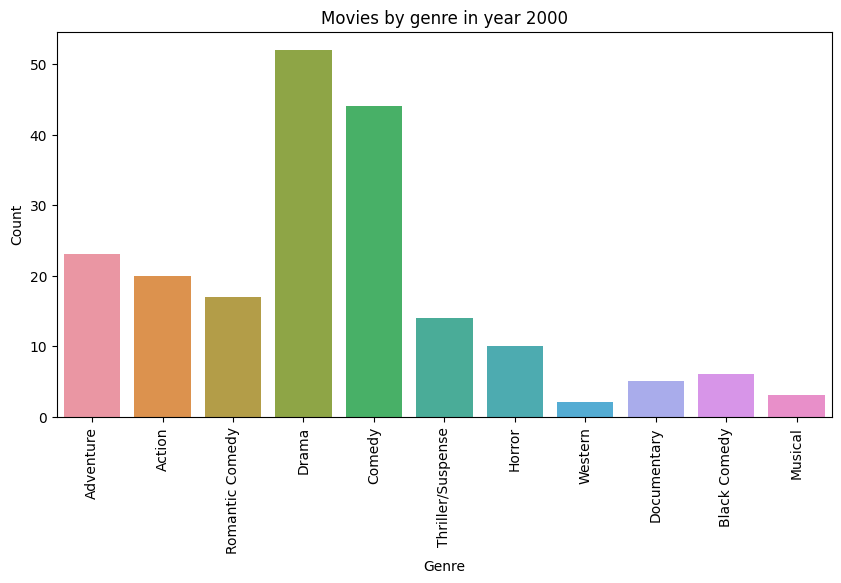

In [4]:
def table_gen(df,y):
    data = {'id': [],'Genero': [], 'Ganancia': []}
    geny = pd.DataFrame(data)
    geny['id'] = df['id_genre']
    geny['Ganancia'] = df['Gross']
    mapeo = gen.set_index('id')['Genre'].to_dict()
    geny['Genero'] = geny['id'].map(mapeo).fillna(geny['Genero'])

    plt.figure(figsize=(10, 5))
    sns.countplot(x='Genero', data=geny)
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.title(f'Movies by genre in year {y}')
    plt.xticks(rotation=90)
    plt.show()
    return geny
    
gen2000 = table_gen (index2000,2000)

In [5]:
mov_by_gen2000 = gen2000['Genero'].value_counts()
mov_by_gen2000

Genero
Drama                52
Comedy               44
Adventure            23
Action               20
Romantic Comedy      17
Thriller/Suspense    14
Horror               10
Black Comedy          6
Documentary           5
Musical               3
Western               2
Name: count, dtype: int64

Por último hago una visualización de las ganancias totales que cada género tuvo en el año y se determina cual tuvo una mayor acumulación.

Lastly, I create a visualization of the total earnings that each genre had for the year and determine which one had the highest accumulation.

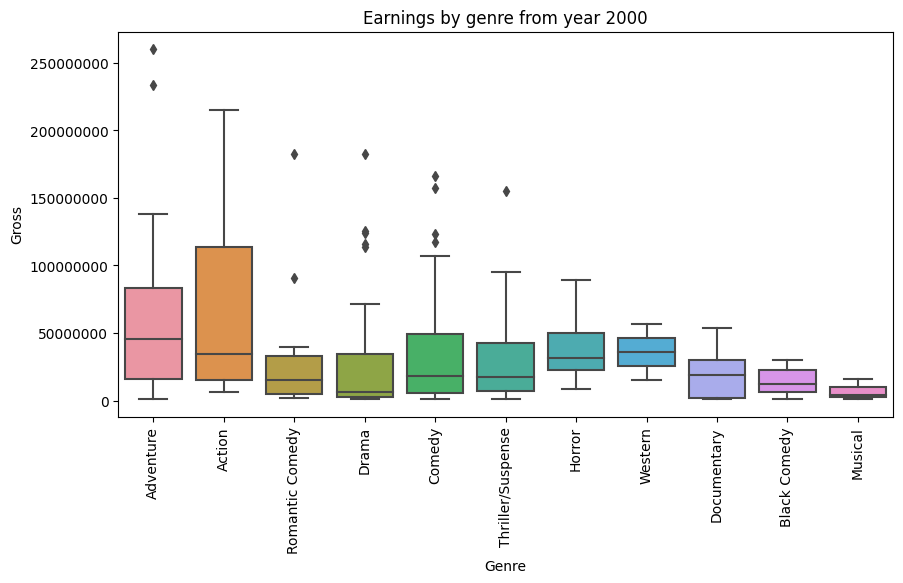

In [6]:
def table_gen_gross(df,y):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Genero', y='Ganancia', data=df)
    plt.xlabel('Genre')
    plt.ylabel('Gross')
    plt.title(f'Earnings by genre from year {y}')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

table_gen_gross(gen2000,2000)

In [7]:
def resume(df):
    resume = df.groupby('Genero')['Ganancia'].agg(['sum', 'mean'])
    max_gen = resume['sum'].idxmax()
    gross_max_gen = resume['sum'].max()
    print("Summary of earnings by genre:")
    print(resume)
    print("\nGenre with the highest earnings:")
    print(max_gen)
    print(f"Total earnings: {gross_max_gen:.2f} dls.")
    col = [max_gen, gross_max_gen]
    return (col)
max_gen2000 = resume(gen2000)

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.297928e+09  6.831202e+07
Adventure          1.478678e+09  6.429035e+07
Black Comedy       8.664301e+07  1.444050e+07
Comedy             1.600586e+09  3.637695e+07
Documentary        1.057447e+08  2.114894e+07
Drama              1.372851e+09  2.640098e+07
Horror             3.902805e+08  3.902805e+07
Musical            2.086752e+07  6.955840e+06
Romantic Comedy    5.217145e+08  3.068909e+07
Thriller/Suspense  4.944421e+08  3.531729e+07
Western            7.246951e+07  3.623475e+07

Genre with the highest earnings:
Comedy
Total earnings: 1600585720.00 dls.


Guardo todo el proceso nterior en una función y procedo a hacer la visualización de los siguientes años.

I save the entire previous process within a function and proceed to visualize the following years.

In [8]:
def year(df,y):
    table_mov_vs_gross(df,y)
    get_info(df, y)
    geny = table_gen (df,y)
    mov_by_year = geny['Genero'].value_counts()
    print(mov_by_year)
    table_gen_gross(geny,y)
    max_geny = resume(geny) 
    return max_geny

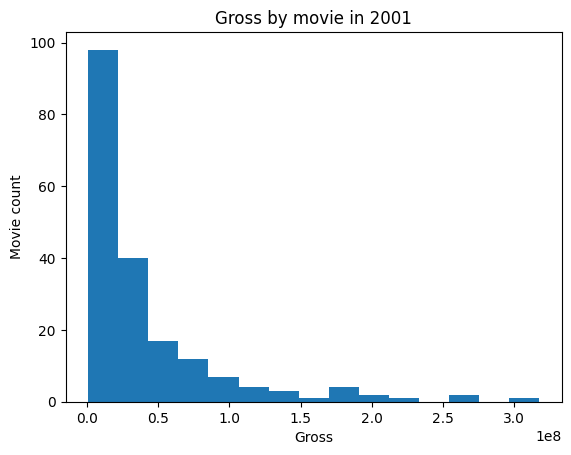

The average earnings of the year 2001 is 39837414.32 dollars
The percentage of movies from the year 2001 with earnings lower than the average is 67.88 %
The movie Harry Potter and the Sorcerer’s Stone has the most earnings with 317723508.5 dollars


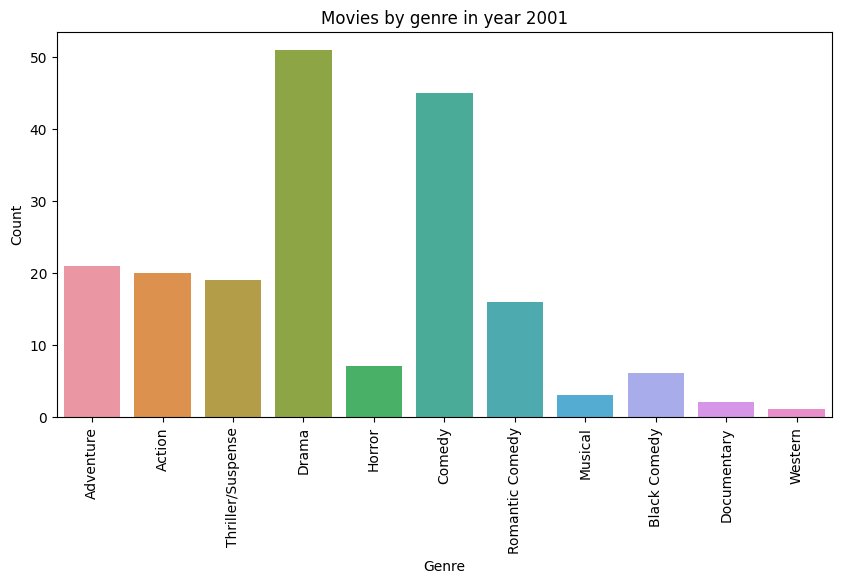

Genero
Drama                51
Comedy               45
Adventure            21
Action               20
Thriller/Suspense    19
Romantic Comedy      16
Horror                7
Black Comedy          6
Musical               3
Documentary           2
Western               1
Name: count, dtype: int64


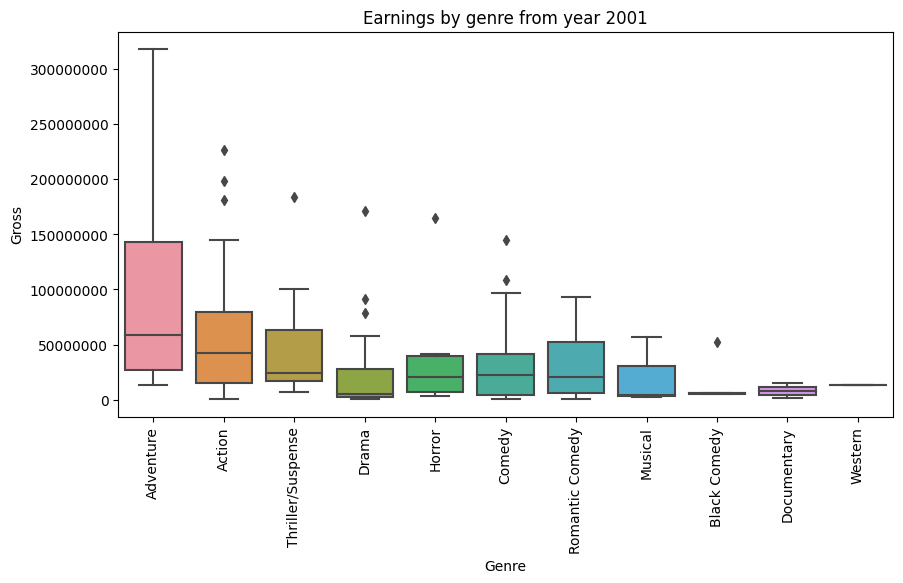

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.342568e+09  6.712840e+07
Adventure          2.012124e+09  1.006062e+08
Black Comedy       8.079189e+07  1.346532e+07
Comedy             1.468918e+09  3.264263e+07
Documentary        1.683430e+07  8.417150e+06
Drama              1.042323e+09  2.043771e+07
Horror             2.827766e+08  4.039665e+07
Musical            6.472717e+07  2.157572e+07
Romantic Comedy    4.989300e+08  3.118312e+07
Thriller/Suspense  8.226954e+08  4.329976e+07
Western            1.329092e+07  1.329092e+07

Genre with the highest earnings:
Adventure
Total earnings: 2012123744.50 dls.


In [9]:
index2001 = pd.read_csv('updated_data/index2001.csv')    
max_gen2001 = year(index2001,2001)

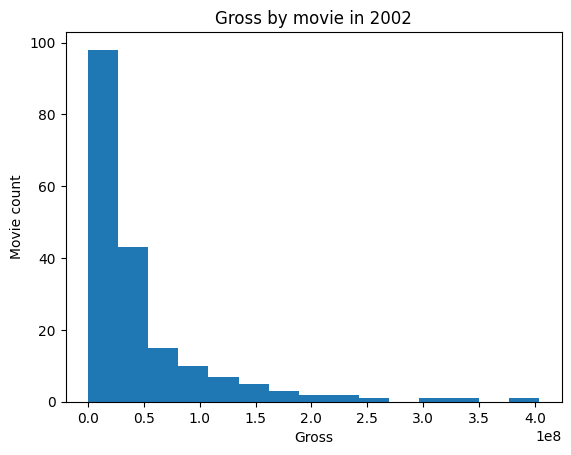

The average earnings of the year 2002 is 47208476.47 dollars
The percentage of movies from the year 2002 with earnings lower than the average is 71.96 %
The movie Spider-Man has the most earnings with 403706375.0 dollars


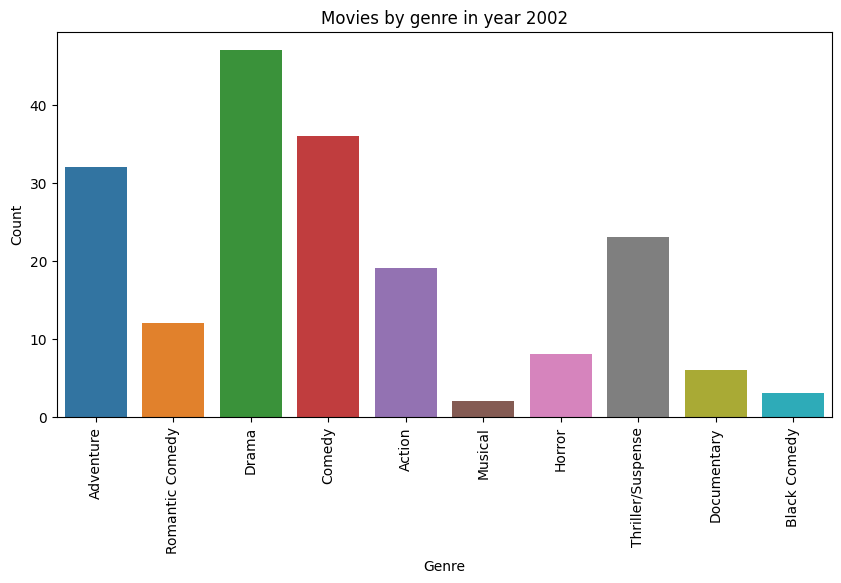

Genero
Drama                47
Comedy               36
Adventure            32
Thriller/Suspense    23
Action               19
Romantic Comedy      12
Horror                8
Documentary           6
Black Comedy          3
Musical               2
Name: count, dtype: int64


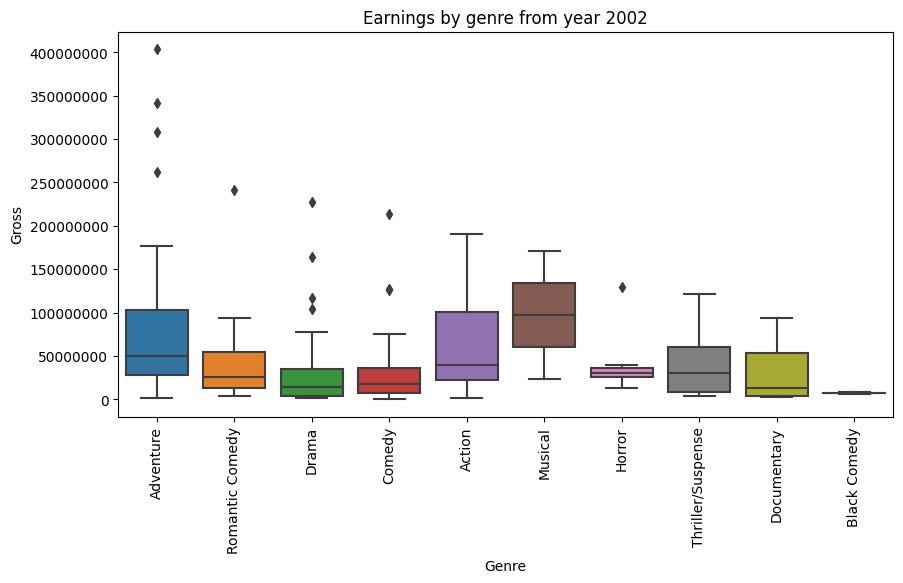

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.181125e+09  6.216445e+07
Adventure          2.900425e+09  9.063829e+07
Black Comedy       2.214729e+07  7.382431e+06
Comedy             1.174703e+09  3.263065e+07
Documentary        1.909318e+08  3.182197e+07
Drama              1.445599e+09  3.075742e+07
Horror             3.218159e+08  4.022698e+07
Musical            1.942844e+08  9.714221e+07
Romantic Comedy    6.074389e+08  5.061991e+07
Thriller/Suspense  8.647469e+08  3.759769e+07

Genre with the highest earnings:
Adventure
Total earnings: 2900425281.42 dls.


In [10]:
index2002 = pd.read_csv('updated_data/index2002.csv')    
max_gen2002 = year(index2002,2002)

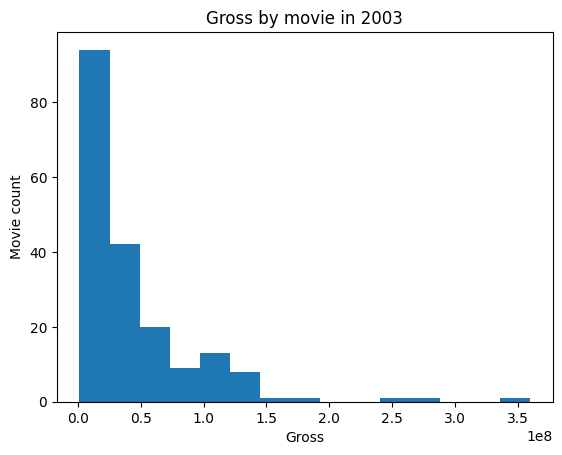

The average earnings of the year 2003 is 41931616.34 dollars
The percentage of movies from the year 2003 with earnings lower than the average is 64.92 %
The movie Finding Nemo has the most earnings with 360122174.0 dollars


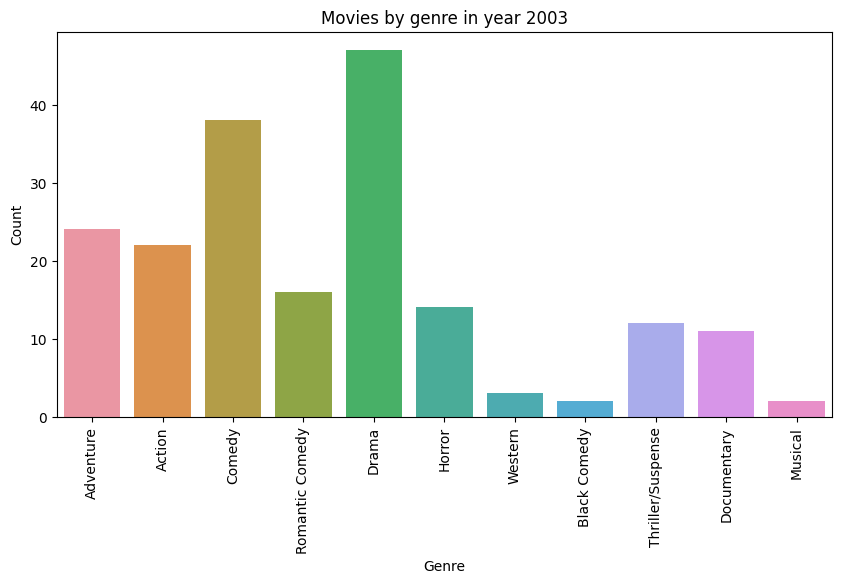

Genero
Drama                47
Comedy               38
Adventure            24
Action               22
Romantic Comedy      16
Horror               14
Thriller/Suspense    12
Documentary          11
Western               3
Black Comedy          2
Musical               2
Name: count, dtype: int64


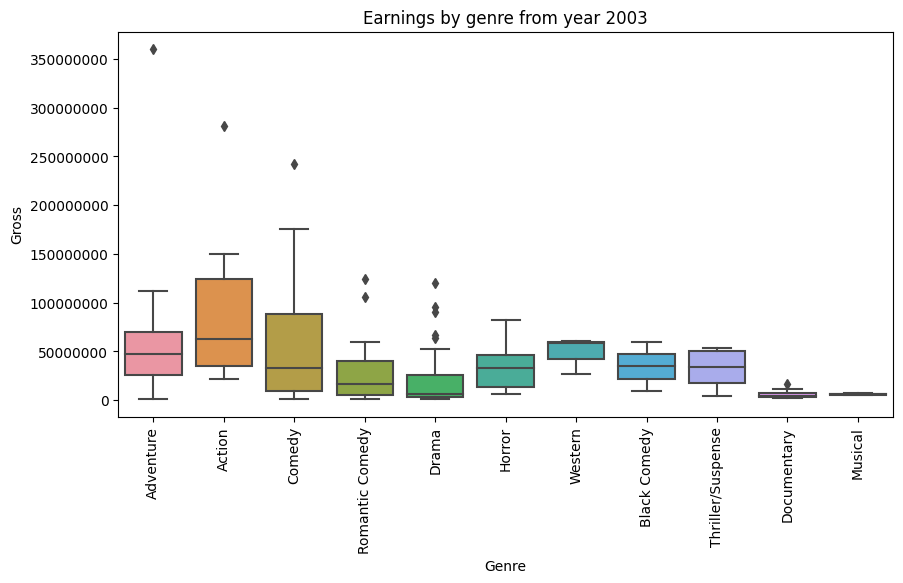

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.877296e+09  8.533163e+07
Adventure          1.502302e+09  6.259592e+07
Black Comedy       6.973240e+07  3.486620e+07
Comedy             2.018149e+09  5.310918e+07
Documentary        6.970681e+07  6.336982e+06
Drama              9.325427e+08  1.984133e+07
Horror             4.907077e+08  3.505055e+07
Musical            1.192932e+07  5.964658e+06
Romantic Comedy    5.030243e+08  3.143902e+07
Thriller/Suspense  3.877874e+08  3.231561e+07
Western            1.457617e+08  4.858722e+07

Genre with the highest earnings:
Comedy
Total earnings: 2018148711.50 dls.


In [11]:
index2003 = pd.read_csv('updated_data/index2003.csv')    
max_gen2003 =year(index2003,2003)

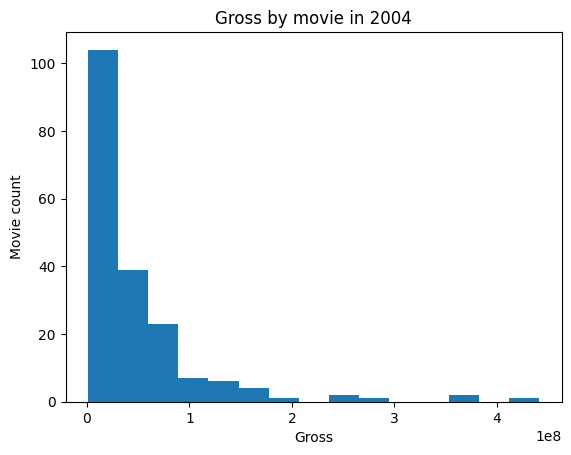

The average earnings of the year 2004 is 47516307.95 dollars
The percentage of movies from the year 2004 with earnings lower than the average is 65.79 %
The movie Shrek 2 has the most earnings with 441226247.0 dollars


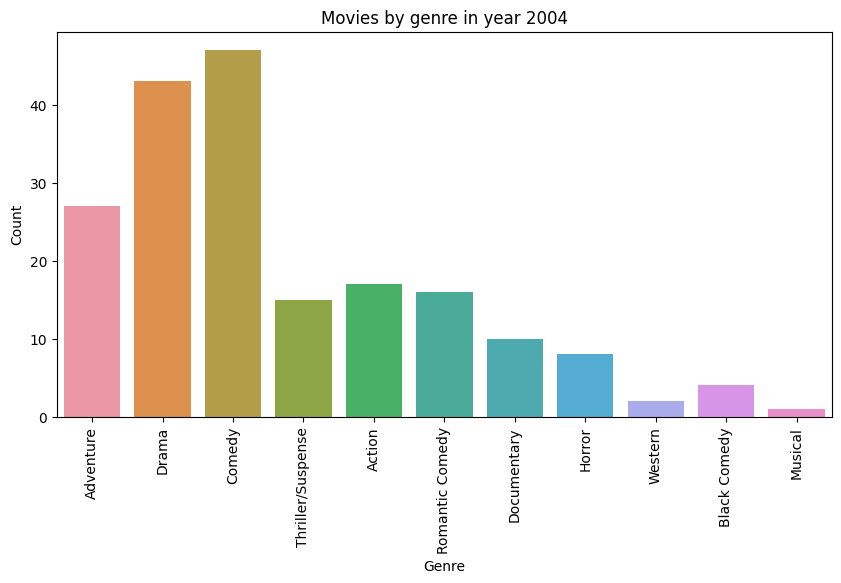

Genero
Comedy               47
Drama                43
Adventure            27
Action               17
Romantic Comedy      16
Thriller/Suspense    15
Documentary          10
Horror                8
Black Comedy          4
Western               2
Musical               1
Name: count, dtype: int64


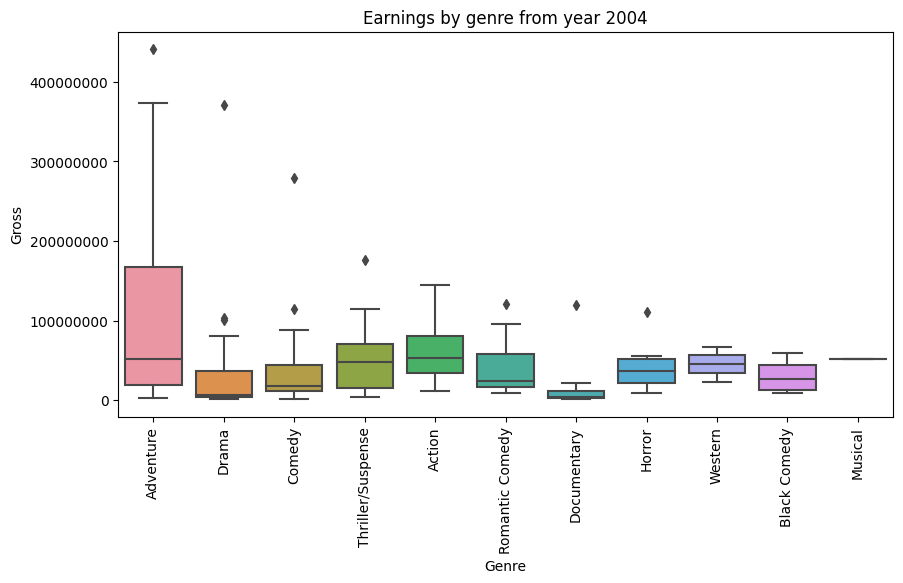

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.062976e+09  6.252802e+07
Adventure          2.749105e+09  1.018187e+08
Black Comedy       1.216673e+08  3.041683e+07
Comedy             1.600970e+09  3.406318e+07
Documentary        1.792119e+08  1.792119e+07
Drama              1.377727e+09  3.204016e+07
Horror             3.387363e+08  4.234204e+07
Musical            5.124731e+07  5.124731e+07
Romantic Comedy    6.594387e+08  4.121492e+07
Thriller/Suspense  7.973157e+08  5.315438e+07
Western            8.970297e+07  4.485148e+07

Genre with the highest earnings:
Adventure
Total earnings: 2749105227.00 dls.


In [12]:
index2004 = pd.read_csv('updated_data/index2004.csv')    
max_gen2004 =year(index2004,2004)

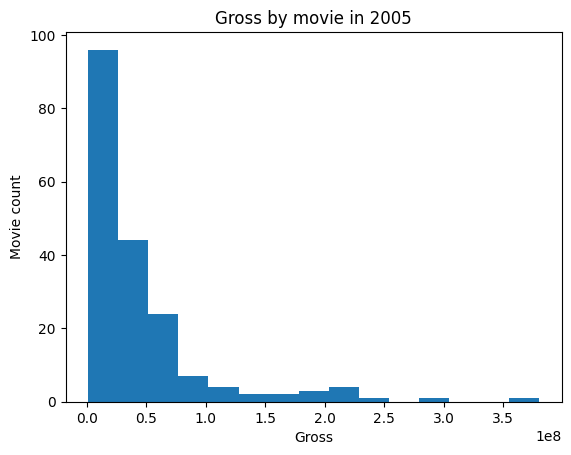

The average earnings of the year 2005 is 43265291.26 dollars
The percentage of movies from the year 2005 with earnings lower than the average is 66.84 %
The movie Star Wars Ep. III: Revenge of the Sith has the most earnings with 380270577.0 dollars


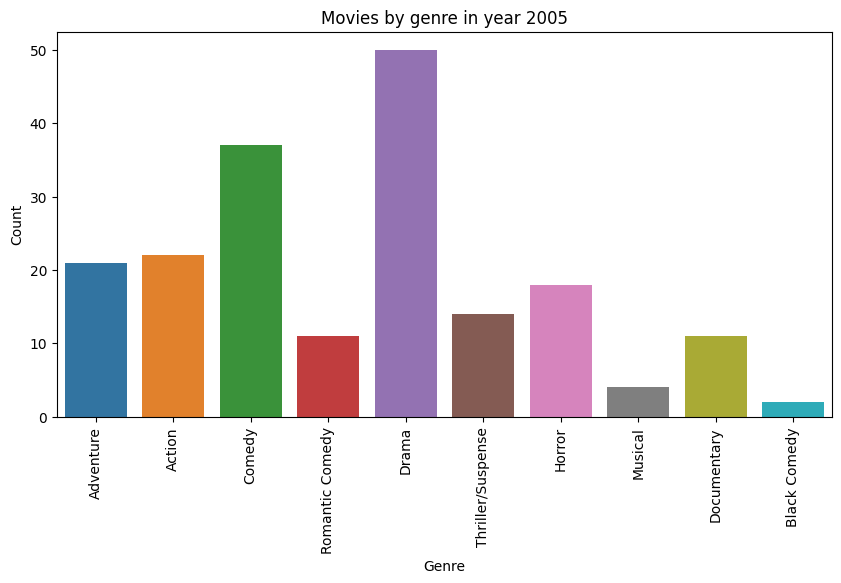

Genero
Drama                50
Comedy               37
Action               22
Adventure            21
Horror               18
Thriller/Suspense    14
Romantic Comedy      11
Documentary          11
Musical               4
Black Comedy          2
Name: count, dtype: int64


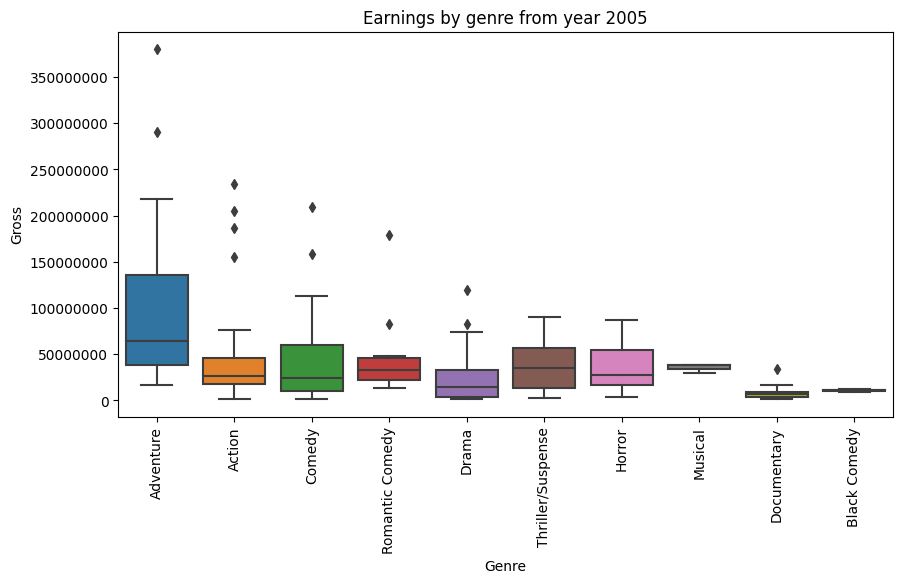

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.235484e+09  5.615834e+07
Adventure          2.172847e+09  1.034689e+08
Black Comedy       2.160876e+07  1.080438e+07
Comedy             1.608428e+09  4.347102e+07
Documentary        9.783556e+07  8.894141e+06
Drama              1.193704e+09  2.387408e+07
Horror             6.691575e+08  3.717542e+07
Musical            1.058553e+08  3.528510e+07
Romantic Comedy    5.348815e+08  4.862559e+07
Thriller/Suspense  5.373395e+08  3.838139e+07

Genre with the highest earnings:
Adventure
Total earnings: 2172846512.00 dls.


In [13]:
index2005 = pd.read_csv('updated_data/index2005.csv')    
max_gen2005 =year(index2005,2005)

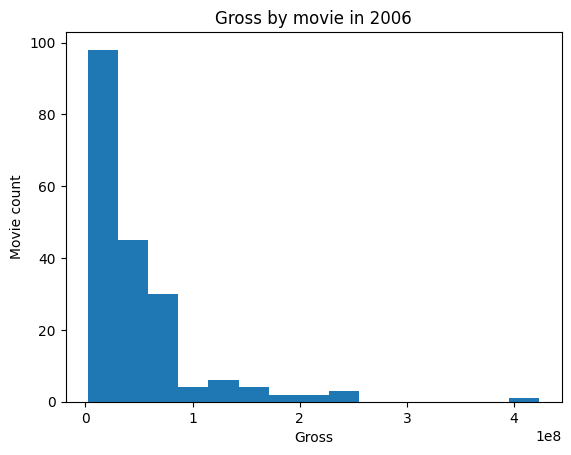

The average earnings of the year 2006 is 46580778.7 dollars
The percentage of movies from the year 2006 with earnings lower than the average is 63.59 %
The movie Pirates of the Caribbean: Dead Man’s Chest has the most earnings with 423315812.0 dollars


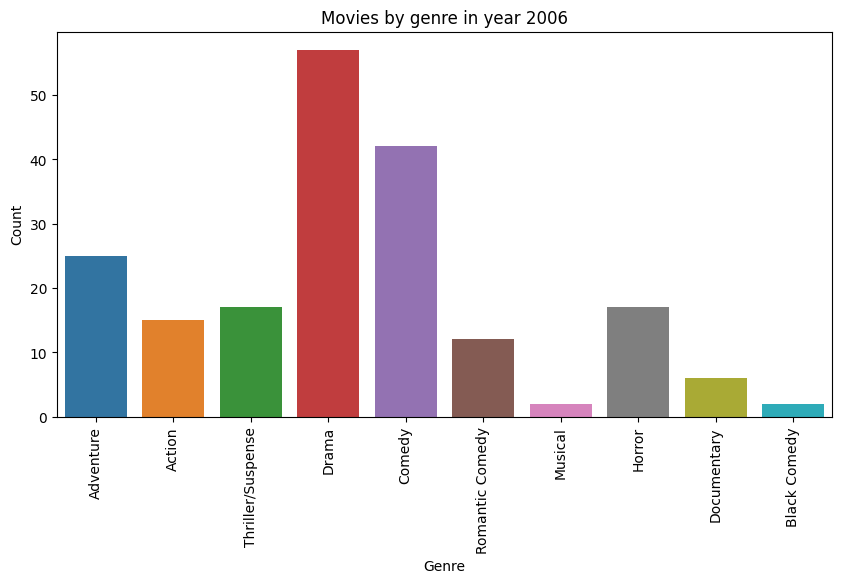

Genero
Drama                57
Comedy               42
Adventure            25
Thriller/Suspense    17
Horror               17
Action               15
Romantic Comedy      12
Documentary           6
Musical               2
Black Comedy          2
Name: count, dtype: int64


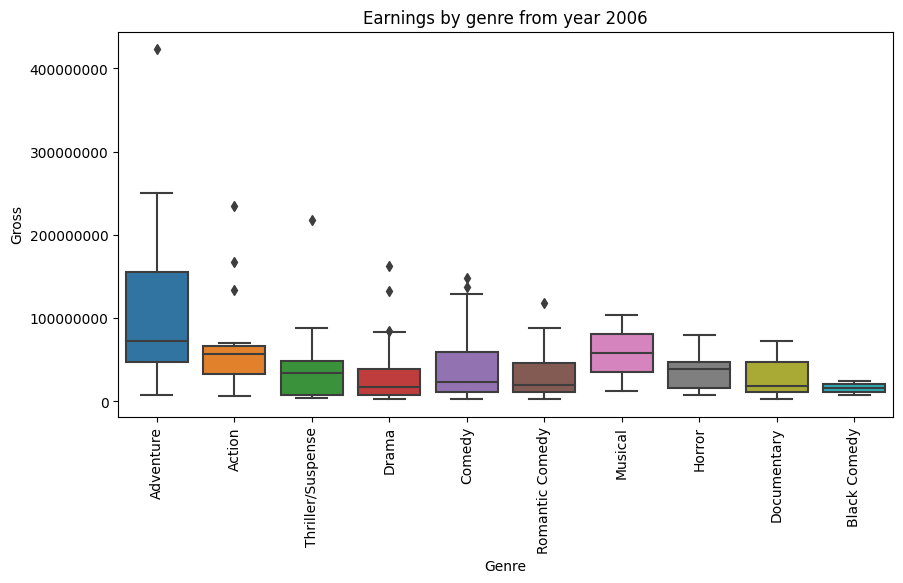

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.066679e+09  7.111194e+07
Adventure          2.594192e+09  1.037677e+08
Black Comedy       3.210754e+07  1.605377e+07
Comedy             1.663077e+09  3.959707e+07
Documentary        1.773078e+08  2.955131e+07
Drama              1.700749e+09  2.983770e+07
Horror             5.813519e+08  3.419717e+07
Musical            1.160359e+08  5.801794e+07
Romantic Comedy    4.291524e+08  3.576270e+07
Thriller/Suspense  7.225989e+08  4.250582e+07

Genre with the highest earnings:
Adventure
Total earnings: 2594192071.50 dls.


In [14]:
index2006 = pd.read_csv('updated_data/index2006.csv')    
max_gen2006 =year(index2006,2006)

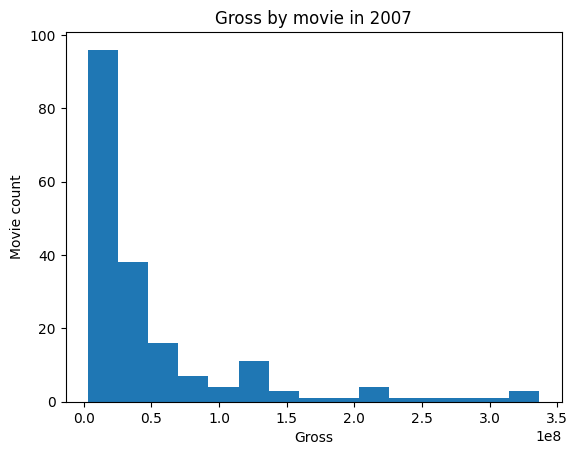

The average earnings of the year 2007 is 49842804.46 dollars
The percentage of movies from the year 2007 with earnings lower than the average is 73.4 %
The movie Spider-Man 3 has the most earnings with 336530303.0 dollars


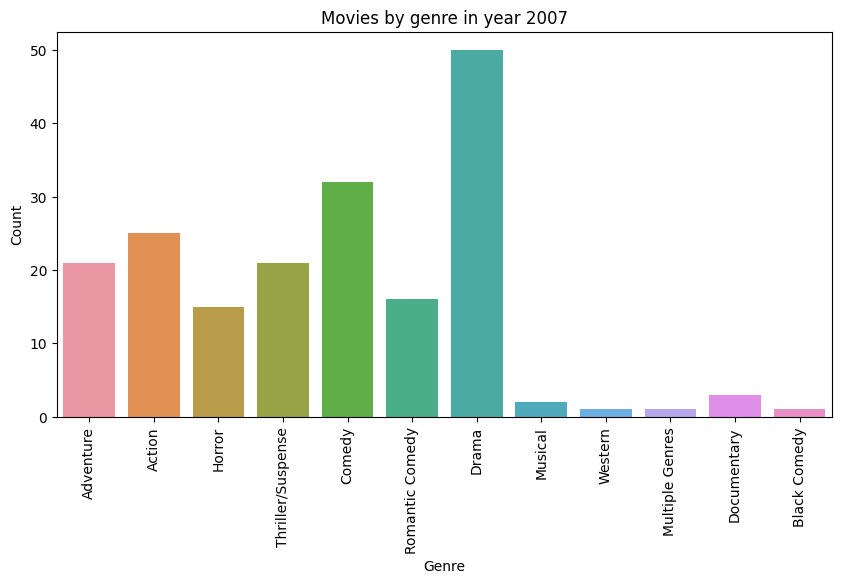

Genero
Drama                50
Comedy               32
Action               25
Adventure            21
Thriller/Suspense    21
Romantic Comedy      16
Horror               15
Documentary           3
Musical               2
Western               1
Multiple Genres       1
Black Comedy          1
Name: count, dtype: int64


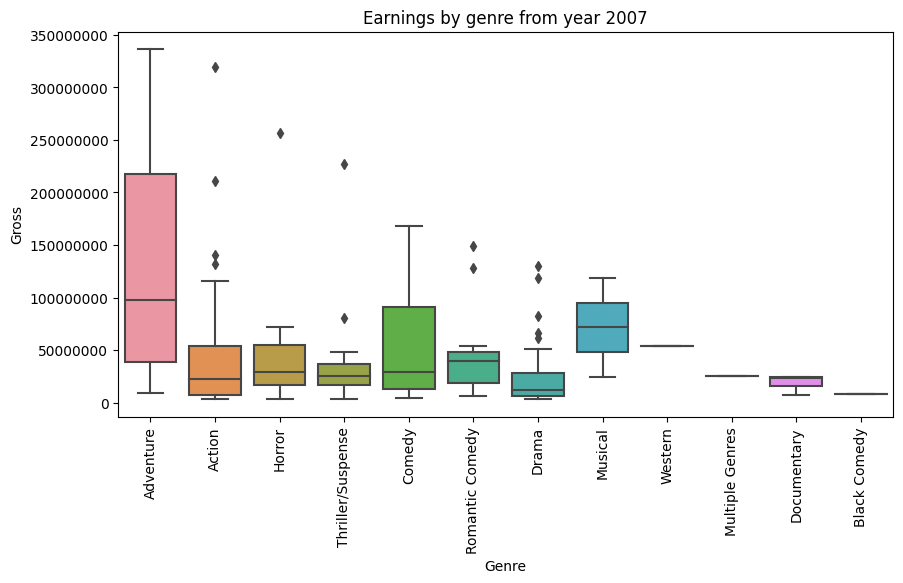

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.350471e+09  5.401882e+07
Adventure          2.784300e+09  1.325857e+08
Black Comedy       8.580428e+06  8.580428e+06
Comedy             1.606991e+09  5.021846e+07
Documentary        5.529207e+07  1.843069e+07
Drama              1.135984e+09  2.271969e+07
Horror             7.048527e+08  4.699018e+07
Multiple Genres    2.503561e+07  2.503561e+07
Musical            1.432155e+08  7.160776e+07
Romantic Comedy    7.259708e+08  4.537318e+07
Thriller/Suspense  7.761473e+08  3.695939e+07
Western            5.360692e+07  5.360692e+07

Genre with the highest earnings:
Adventure
Total earnings: 2784300202.00 dls.


In [15]:
index2007 = pd.read_csv('updated_data/index2007.csv')    
max_gen2007 =year(index2007,2007)

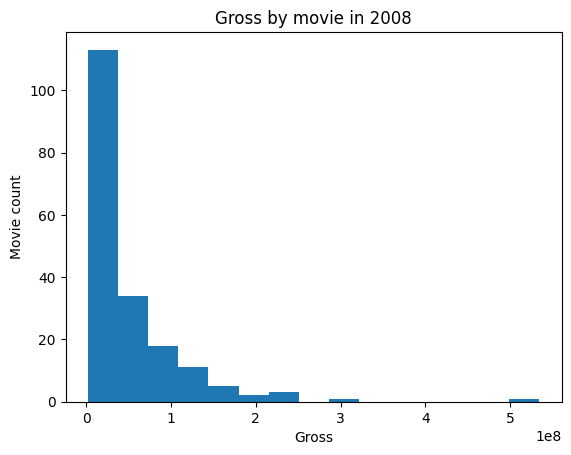

The average earnings of the year 2008 is 48655160.09 dollars
The percentage of movies from the year 2008 with earnings lower than the average is 70.21 %
The movie The Dark Knight has the most earnings with 534396959.3333333 dollars


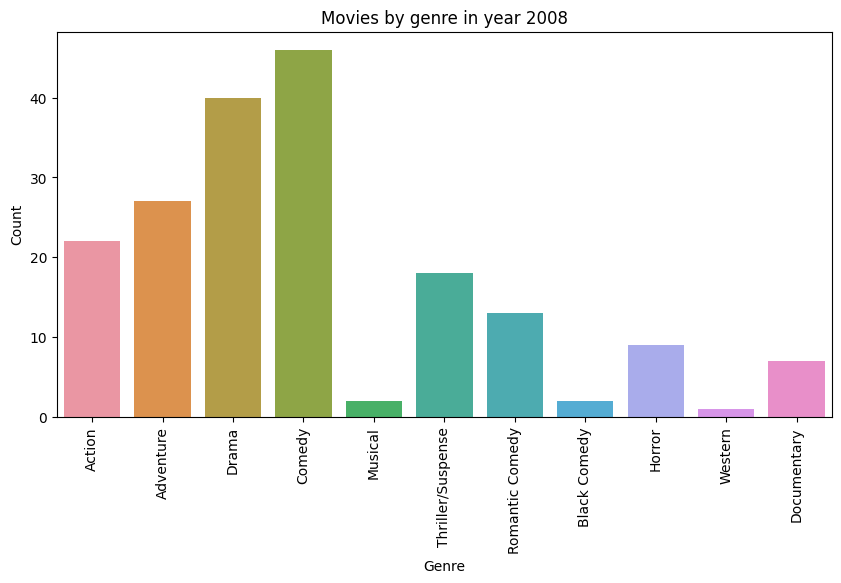

Genero
Comedy               46
Drama                40
Adventure            27
Action               22
Thriller/Suspense    18
Romantic Comedy      13
Horror                9
Documentary           7
Musical               2
Black Comedy          2
Western               1
Name: count, dtype: int64


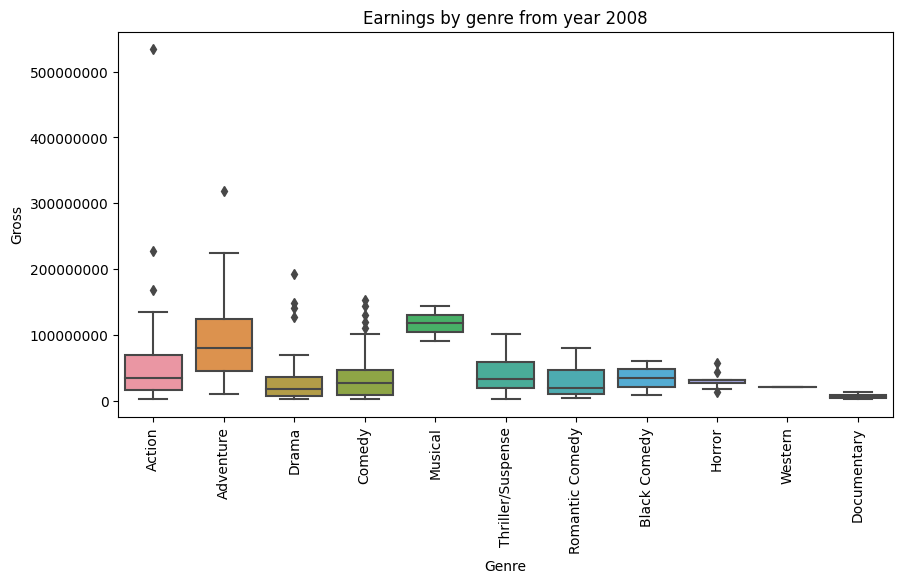

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.601838e+09  7.281083e+07
Adventure          2.596511e+09  9.616706e+07
Black Comedy       6.815617e+07  3.407809e+07
Comedy             1.834919e+09  3.988954e+07
Documentary        4.319019e+07  6.170027e+06
Drama              1.356123e+09  3.390306e+07
Horror             2.781119e+08  3.090132e+07
Musical            2.346895e+08  1.173447e+08
Romantic Comedy    4.056136e+08  3.120104e+07
Thriller/Suspense  6.949101e+08  3.860612e+07
Western            2.020993e+07  2.020993e+07

Genre with the highest earnings:
Adventure
Total earnings: 2596510500.83 dls.


In [16]:
index2008 = pd.read_csv('updated_data/index2008.csv')    
max_gen2008 =year(index2008,2008)

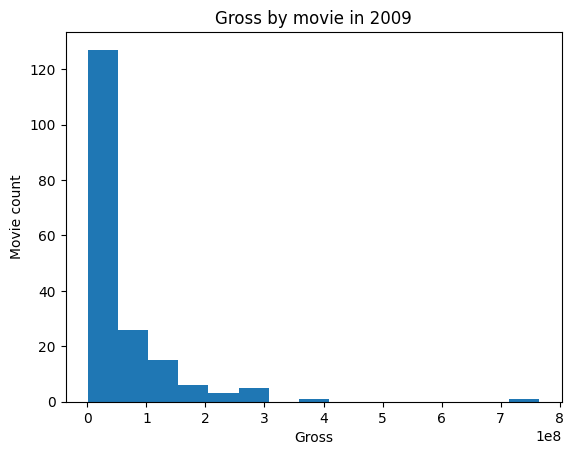

The average earnings of the year 2009 is 56935022.08 dollars
The percentage of movies from the year 2009 with earnings lower than the average is 69.73 %
The movie Avatar has the most earnings with 765165137.6666666 dollars


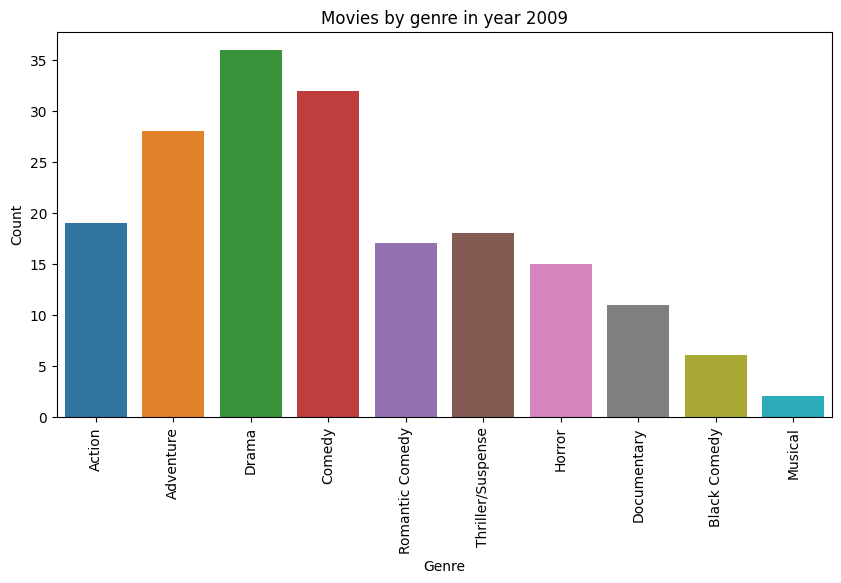

Genero
Drama                36
Comedy               32
Adventure            28
Action               19
Thriller/Suspense    18
Romantic Comedy      17
Horror               15
Documentary          11
Black Comedy          6
Musical               2
Name: count, dtype: int64


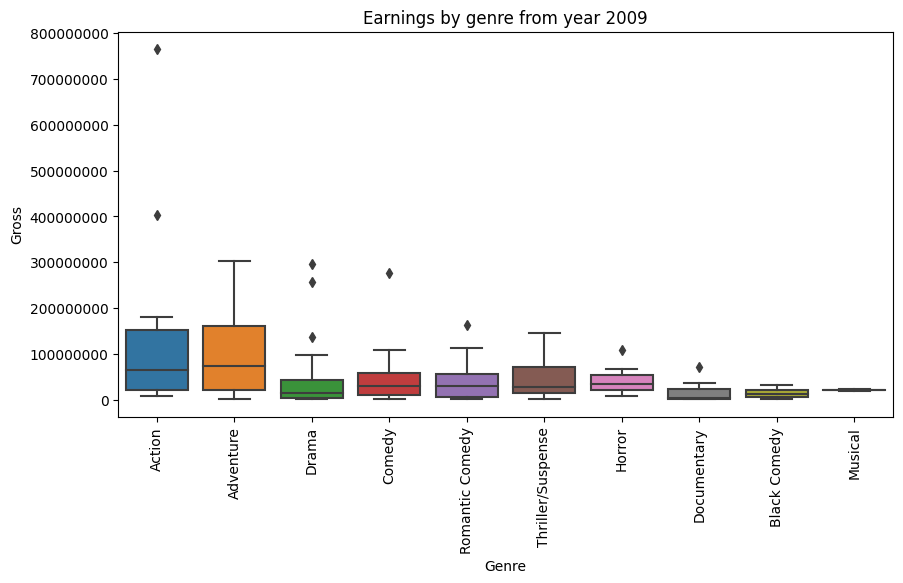

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.449493e+09  1.289207e+08
Adventure          2.671019e+09  9.892664e+07
Black Comedy       8.922326e+07  1.487054e+07
Comedy             1.381062e+09  4.315817e+07
Documentary        1.739167e+08  1.581061e+07
Drama              1.494090e+09  4.150250e+07
Horror             5.997505e+08  3.998337e+07
Musical            4.213248e+07  2.106624e+07
Romantic Comedy    7.133568e+08  4.196217e+07
Thriller/Suspense  8.428377e+08  4.682432e+07

Genre with the highest earnings:
Adventure
Total earnings: 2671019155.33 dls.


In [17]:
index2009 = pd.read_csv('updated_data/index2009.csv')    
max_gen2009 =year(index2009,2009)

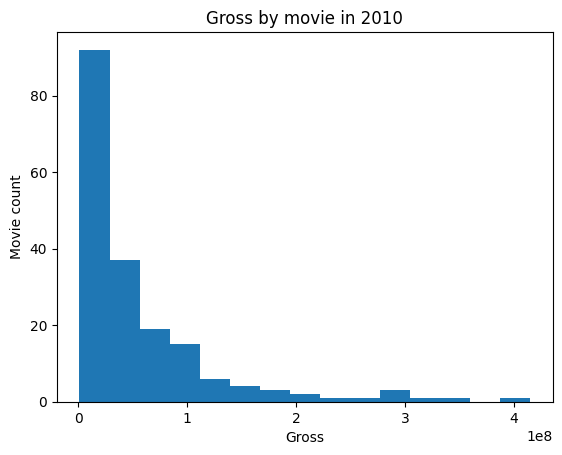

The average earnings of the year 2010 is 52981979.92 dollars
The percentage of movies from the year 2010 with earnings lower than the average is 68.28 %
The movie Toy Story 3 has the most earnings with 415004880.0 dollars


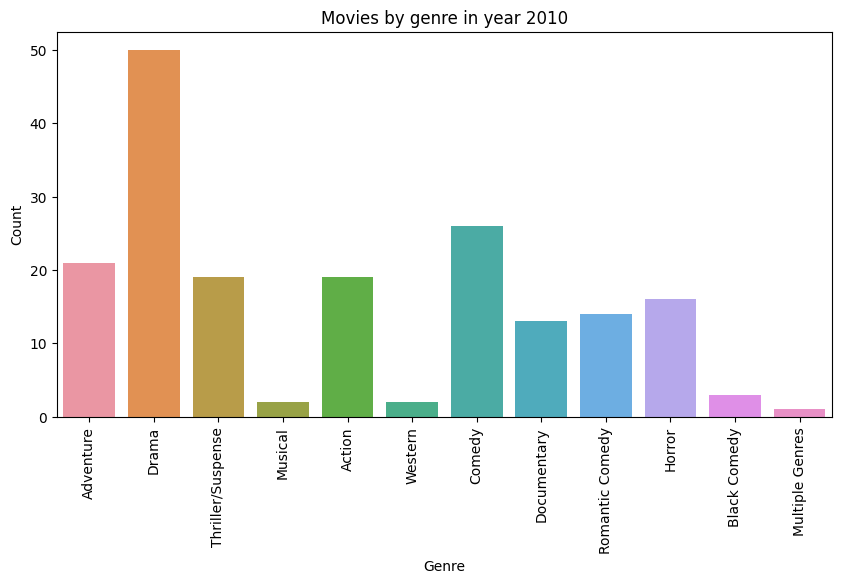

Genero
Drama                50
Comedy               26
Adventure            21
Thriller/Suspense    19
Action               19
Horror               16
Romantic Comedy      14
Documentary          13
Black Comedy          3
Musical               2
Western               2
Multiple Genres       1
Name: count, dtype: int64


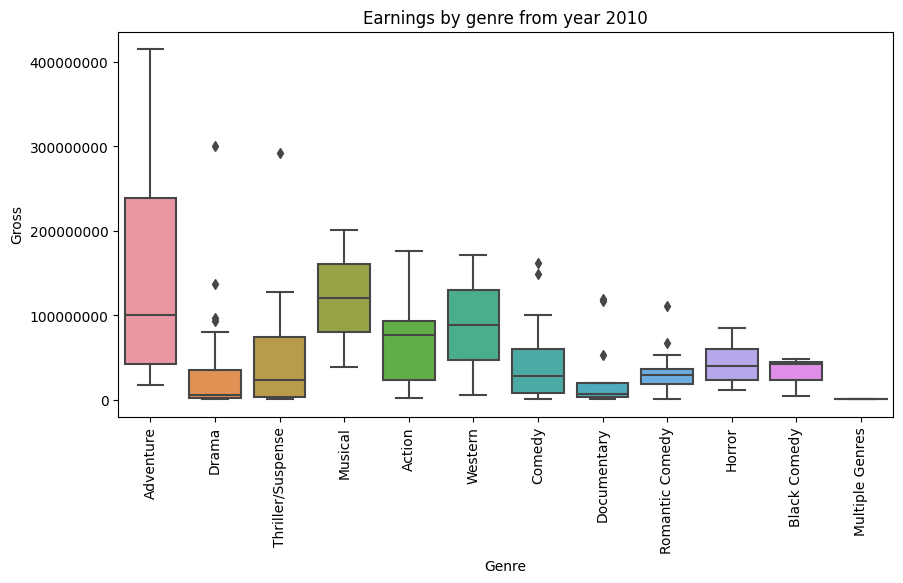

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             1.282158e+09  6.748202e+07
Adventure          3.018326e+09  1.437298e+08
Black Comedy       9.484422e+07  3.161474e+07
Comedy             1.133807e+09  4.360797e+07
Documentary        3.491708e+08  2.685929e+07
Drama              1.448802e+09  2.897604e+07
Horror             6.496052e+08  4.060032e+07
Multiple Genres    1.018169e+06  1.018169e+06
Musical            2.402626e+08  1.201313e+08
Romantic Comedy    4.635213e+08  3.310866e+07
Thriller/Suspense  9.962245e+08  5.243287e+07
Western            1.769083e+08  8.845415e+07

Genre with the highest earnings:
Adventure
Total earnings: 3018325797.83 dls.


In [18]:
index2010 = pd.read_csv('updated_data/index2010.csv')    
max_gen2010 =year(index2010,2010)

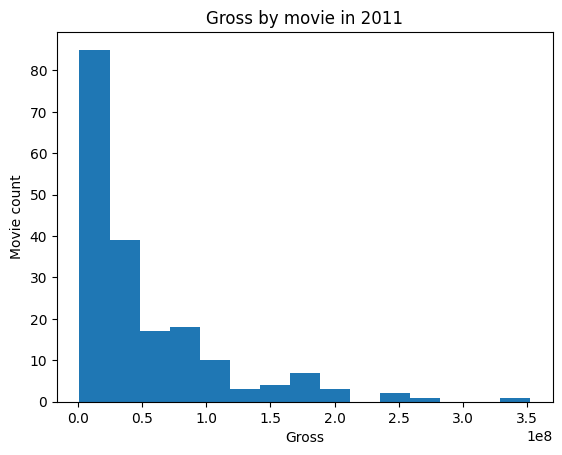

The average earnings of the year 2011 is 50013895.64 dollars
The percentage of movies from the year 2011 with earnings lower than the average is 65.79 %
The movie Transformers: Dark of the Moon has the most earnings with 352390543.0 dollars


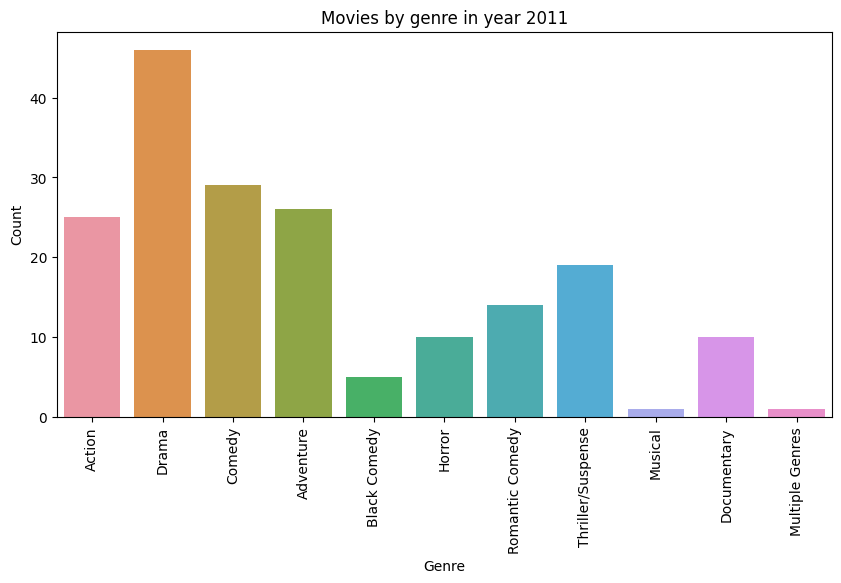

Genero
Drama                46
Comedy               29
Adventure            26
Action               25
Thriller/Suspense    19
Romantic Comedy      14
Horror               10
Documentary          10
Black Comedy          5
Musical               1
Multiple Genres       1
Name: count, dtype: int64


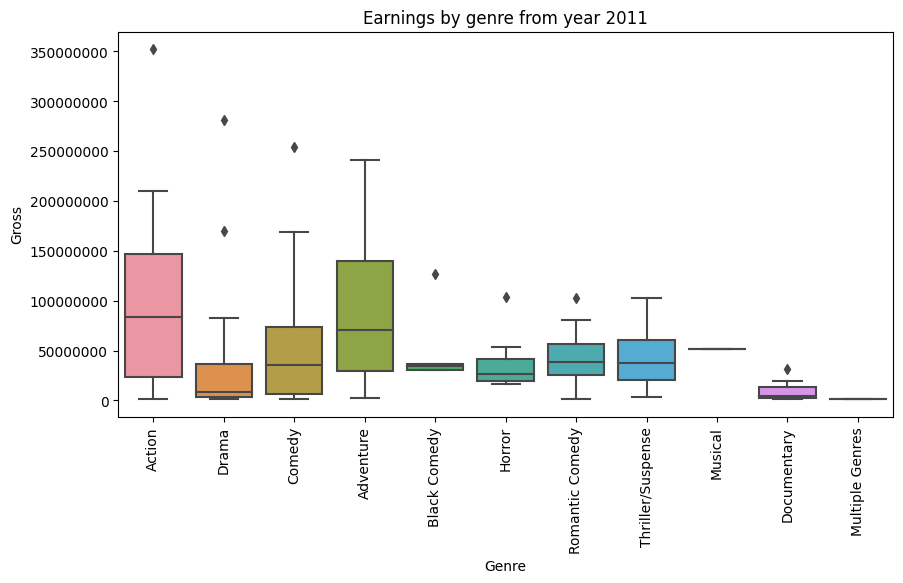

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.265980e+09  9.063920e+07
Adventure          2.244485e+09  8.632635e+07
Black Comedy       2.600572e+08  5.201143e+07
Comedy             1.388206e+09  4.786919e+07
Documentary        9.193225e+07  9.193225e+06
Drama              1.339693e+09  2.912376e+07
Horror             3.674344e+08  3.674344e+07
Multiple Genres    1.352152e+06  1.352152e+06
Musical            5.180274e+07  5.180274e+07
Romantic Comedy    6.078540e+08  4.341814e+07
Thriller/Suspense  7.891403e+08  4.153370e+07

Genre with the highest earnings:
Action
Total earnings: 2265980097.17 dls.


In [19]:
index2011 = pd.read_csv('updated_data/index2011.csv')    
max_gen2011 =year(index2011,2011)

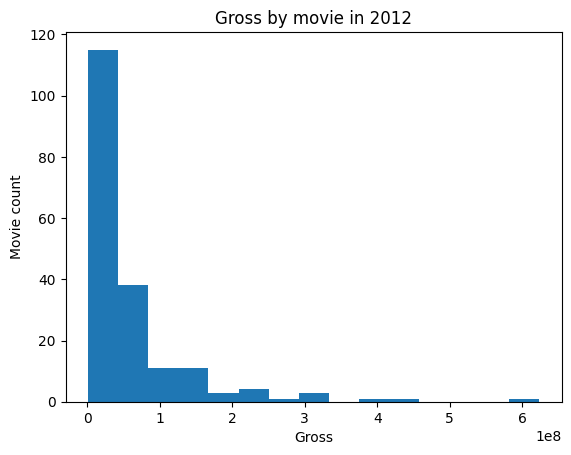

The average earnings of the year 2012 is 56132246.62 dollars
The percentage of movies from the year 2012 with earnings lower than the average is 70.37 %
The movie The Avengers has the most earnings with 623331789.0 dollars


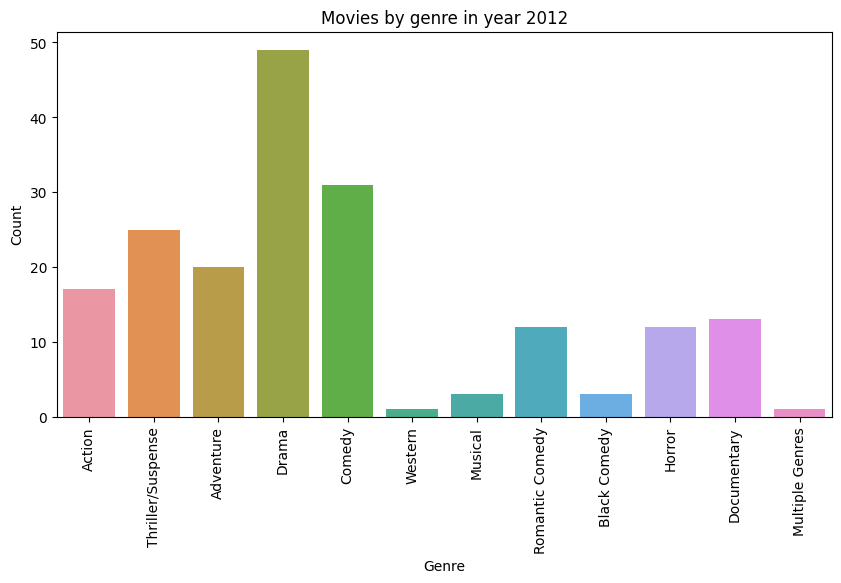

Genero
Drama                49
Comedy               31
Thriller/Suspense    25
Adventure            20
Action               17
Documentary          13
Romantic Comedy      12
Horror               12
Musical               3
Black Comedy          3
Western               1
Multiple Genres       1
Name: count, dtype: int64


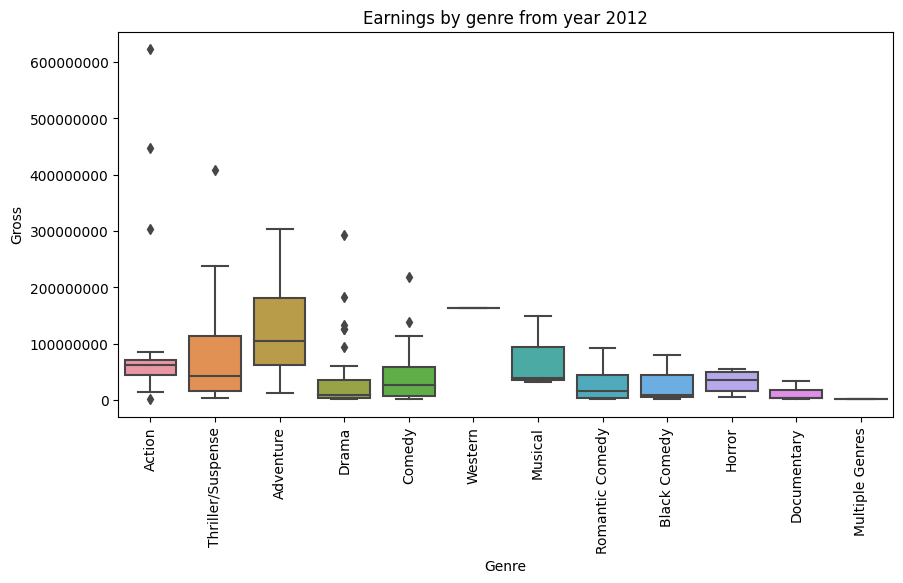

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.045070e+09  1.202982e+08
Adventure          2.518879e+09  1.259440e+08
Black Comedy       9.022328e+07  3.007443e+07
Comedy             1.285947e+09  4.148218e+07
Documentary        1.210339e+08  9.310302e+06
Drama              1.570602e+09  3.205311e+07
Horror             3.842047e+08  3.201706e+07
Multiple Genres    1.702415e+06  1.702415e+06
Musical            2.182605e+08  7.275350e+07
Romantic Comedy    3.270561e+08  2.725467e+07
Thriller/Suspense  1.855083e+09  7.420332e+07
Western            1.628054e+08  1.628054e+08

Genre with the highest earnings:
Adventure
Total earnings: 2518879262.67 dls.


In [20]:
index2012 = pd.read_csv('updated_data/index2012.csv')    
max_gen2012 =year(index2012,2012)

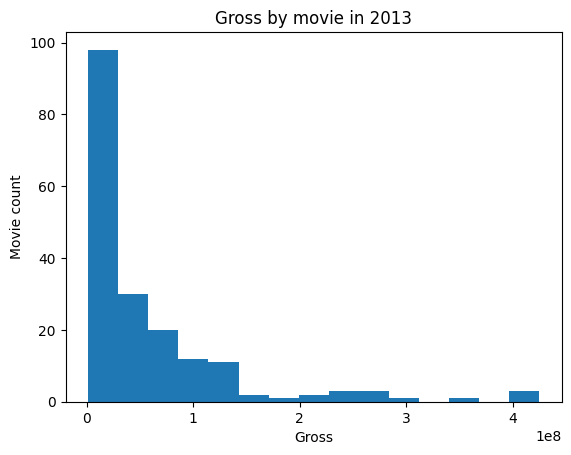

The average earnings of the year 2013 is 56479958.14 dollars
The percentage of movies from the year 2013 with earnings lower than the average is 67.38 %
The movie The Hunger Games: Catching Fire has the most earnings with 424668047.0 dollars


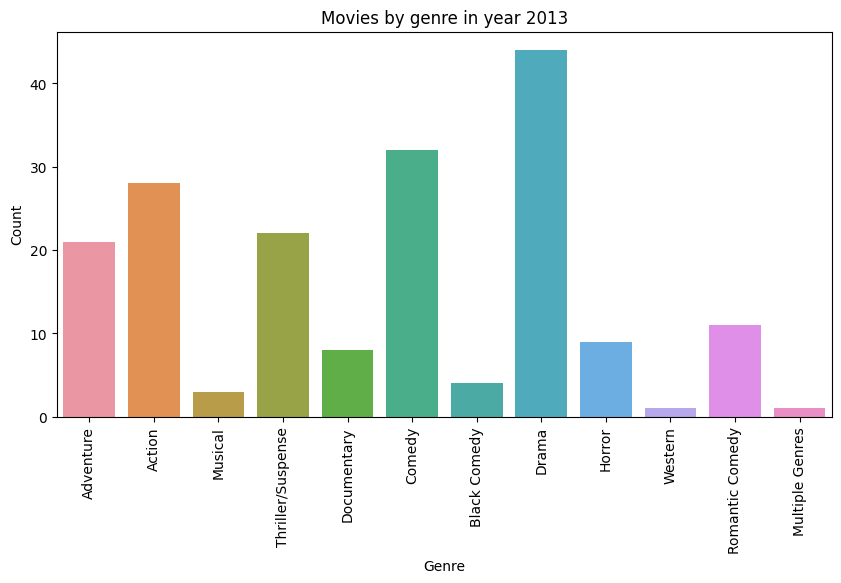

Genero
Drama                44
Comedy               32
Action               28
Thriller/Suspense    22
Adventure            21
Romantic Comedy      11
Horror                9
Documentary           8
Black Comedy          4
Musical               3
Western               1
Multiple Genres       1
Name: count, dtype: int64


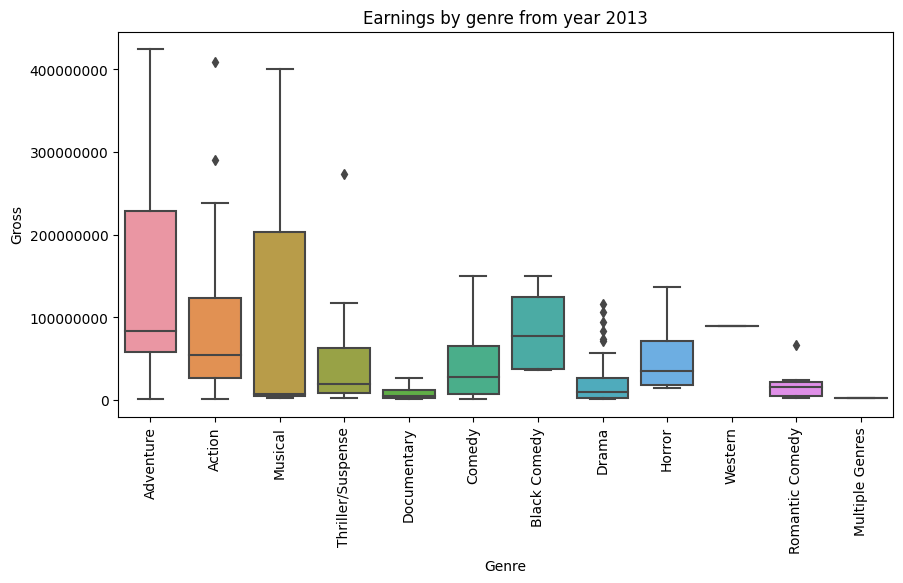

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.535240e+09  9.054430e+07
Adventure          2.877316e+09  1.370150e+08
Black Comedy       3.416907e+08  8.542267e+07
Comedy             1.428906e+09  4.465330e+07
Documentary        7.814109e+07  9.767636e+06
Drama              1.066362e+09  2.423550e+07
Horror             4.675552e+08  5.195057e+07
Multiple Genres    2.142342e+06  2.142342e+06
Musical            4.103146e+08  1.367715e+08
Romantic Comedy    1.943718e+08  1.767016e+07
Thriller/Suspense  1.005873e+09  4.572151e+07
Western            8.930212e+07  8.930212e+07

Genre with the highest earnings:
Adventure
Total earnings: 2877315590.50 dls.


In [21]:
index2013 = pd.read_csv('updated_data/index2013.csv')    
max_gen2013 =year(index2013,2013)

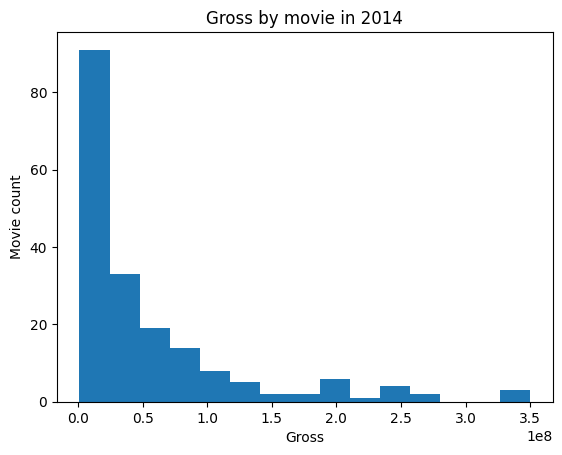

The average earnings of the year 2014 is 53425377.79 dollars
The percentage of movies from the year 2014 with earnings lower than the average is 69.47 %
The movie American Sniper has the most earnings with 350126372.0 dollars


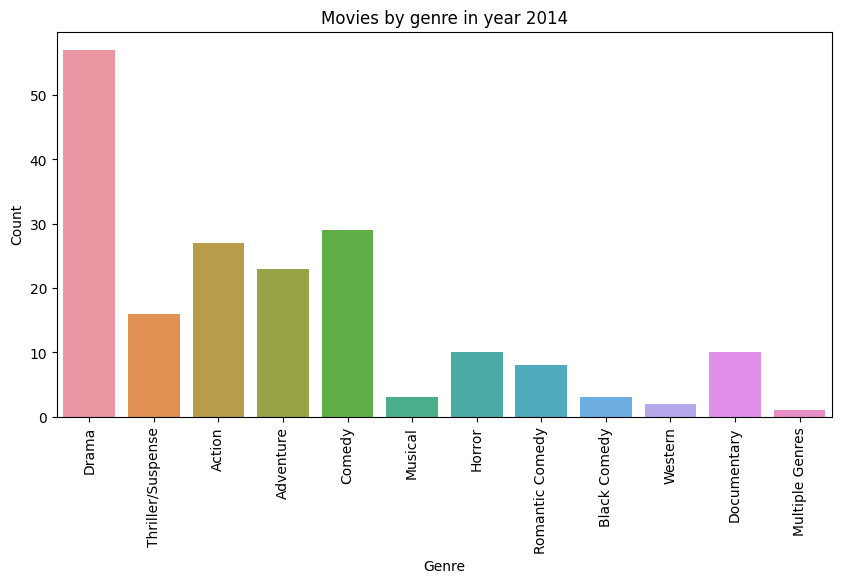

Genero
Drama                57
Comedy               29
Action               27
Adventure            23
Thriller/Suspense    16
Horror               10
Documentary          10
Romantic Comedy       8
Musical               3
Black Comedy          3
Western               2
Multiple Genres       1
Name: count, dtype: int64


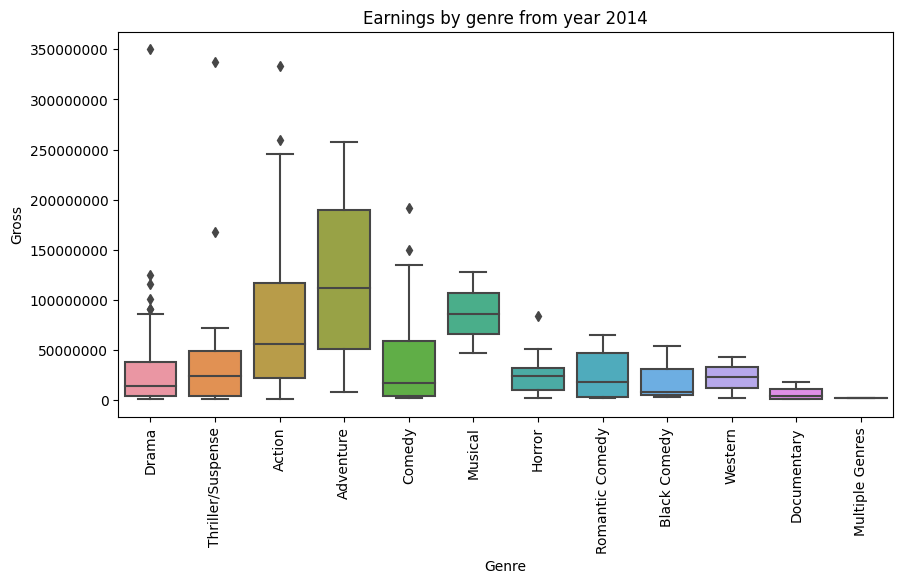

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.516086e+09  9.318837e+07
Adventure          2.757885e+09  1.199080e+08
Black Comedy       6.582498e+07  2.194166e+07
Comedy             1.207952e+09  4.165351e+07
Documentary        6.974467e+07  6.974467e+06
Drama              1.906870e+09  3.345387e+07
Horror             2.760459e+08  2.760459e+07
Multiple Genres    2.357890e+06  2.357890e+06
Musical            2.609606e+08  8.698688e+07
Romantic Comedy    2.054285e+08  2.567857e+07
Thriller/Suspense  8.334786e+08  5.209241e+07
Western            4.536012e+07  2.268006e+07

Genre with the highest earnings:
Adventure
Total earnings: 2757884882.17 dls.


In [22]:
index2014 = pd.read_csv('updated_data/index2014.csv')    
max_gen2014 =year(index2014,2014)

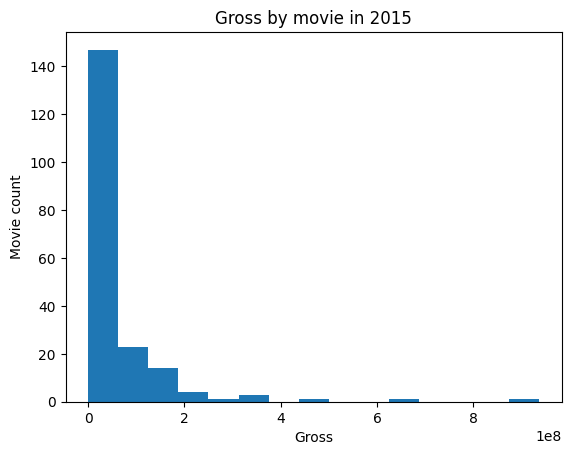

The average earnings of the year 2015 is 56323475.43 dollars
The percentage of movies from the year 2015 with earnings lower than the average is 73.33 %
The movie Star Wars Ep. VII: The Force Awakens has the most earnings with 936662225.0 dollars


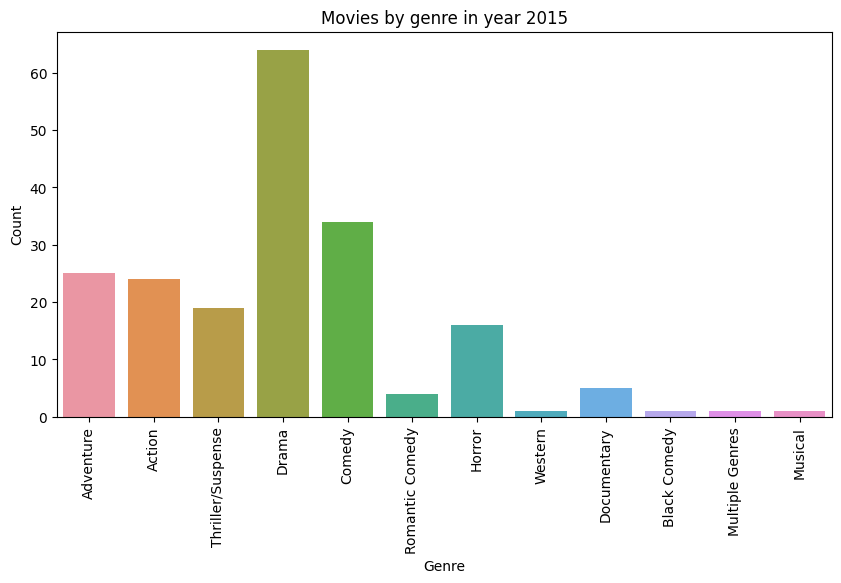

Genero
Drama                64
Comedy               34
Adventure            25
Action               24
Thriller/Suspense    19
Horror               16
Documentary           5
Romantic Comedy       4
Western               1
Black Comedy          1
Multiple Genres       1
Musical               1
Name: count, dtype: int64


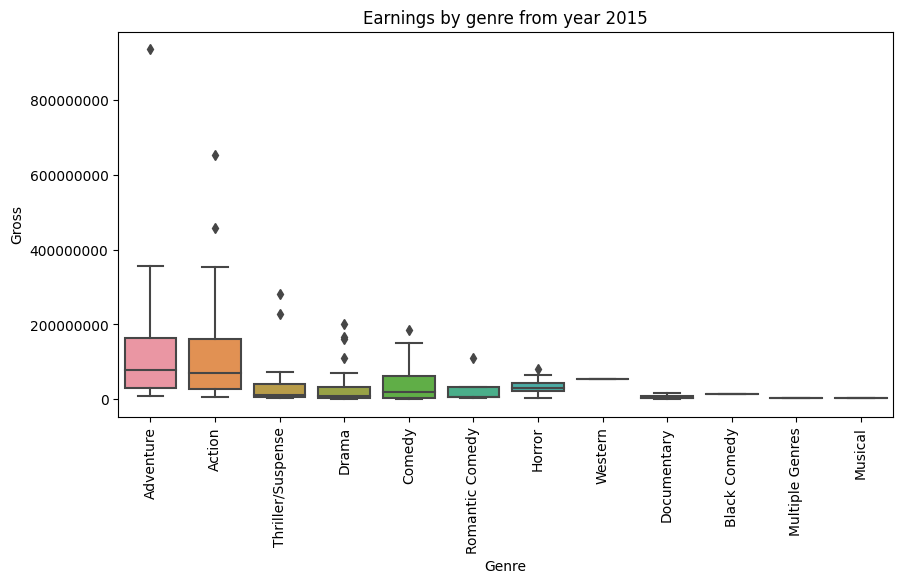

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             3.036789e+09  1.265329e+08
Adventure          3.393422e+09  1.357369e+08
Black Comedy       1.443852e+07  1.443852e+07
Comedy             1.304006e+09  3.835312e+07
Documentary        3.154931e+07  6.309862e+06
Drama              1.630351e+09  2.547423e+07
Horror             5.391759e+08  3.369850e+07
Multiple Genres    2.412493e+06  2.412493e+06
Musical            2.184640e+06  2.184640e+06
Romantic Comedy    1.261499e+08  3.153749e+07
Thriller/Suspense  8.484817e+08  4.465693e+07
Western            5.411742e+07  5.411742e+07

Genre with the highest earnings:
Adventure
Total earnings: 3393422061.50 dls.


In [23]:
index2015 = pd.read_csv('updated_data/index2015.csv')    
max_gen2015 =year(index2015,2015)

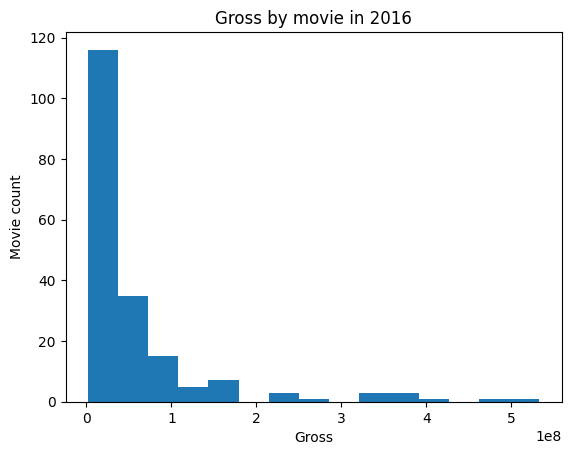

The average earnings of the year 2016 is 57504355.91 dollars
The percentage of movies from the year 2016 with earnings lower than the average is 70.98 %
The movie Rogue One: A Star Wars Story has the most earnings with 532631546.3333333 dollars


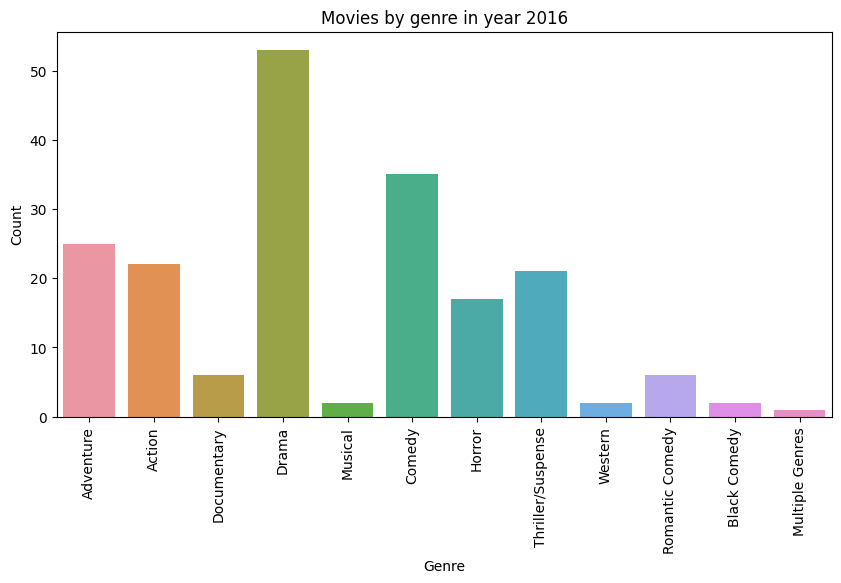

Genero
Drama                53
Comedy               35
Adventure            25
Action               22
Thriller/Suspense    21
Horror               17
Documentary           6
Romantic Comedy       6
Musical               2
Western               2
Black Comedy          2
Multiple Genres       1
Name: count, dtype: int64


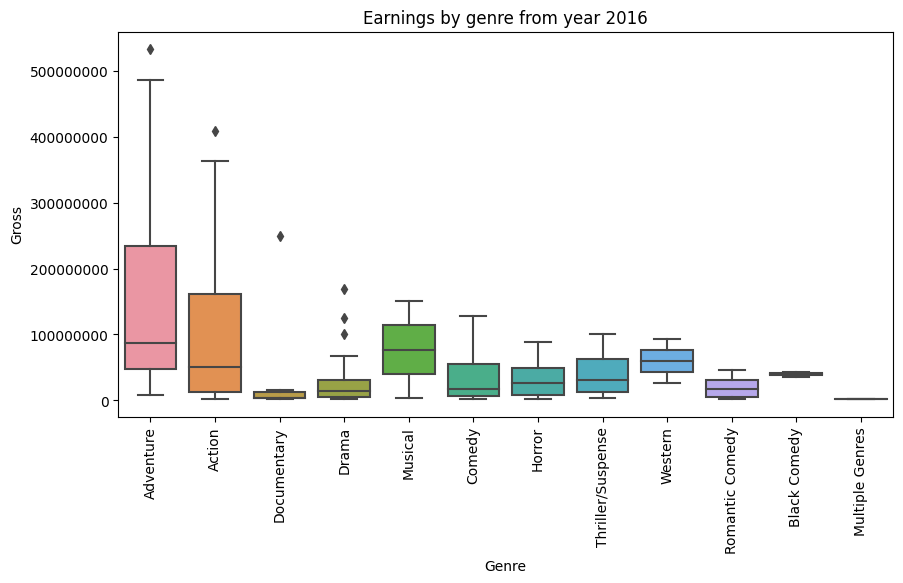

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.461731e+09  1.118969e+08
Adventure          3.890999e+09  1.556400e+08
Black Comedy       7.929629e+07  3.964814e+07
Comedy             1.242500e+09  3.550000e+07
Documentary        2.767328e+08  4.612213e+07
Drama              1.319137e+09  2.488938e+07
Horror             5.167048e+08  3.229405e+07
Multiple Genres    2.816816e+06  2.816816e+06
Musical            1.543389e+08  7.716946e+07
Romantic Comedy    1.191673e+08  1.986121e+07
Thriller/Suspense  7.758764e+08  3.879382e+07
Western            1.204405e+08  6.022025e+07

Genre with the highest earnings:
Adventure
Total earnings: 3890999274.33 dls.


In [24]:
index2016 = pd.read_csv('updated_data/index2016.csv')    
max_gen2016 =year(index2016,2016)

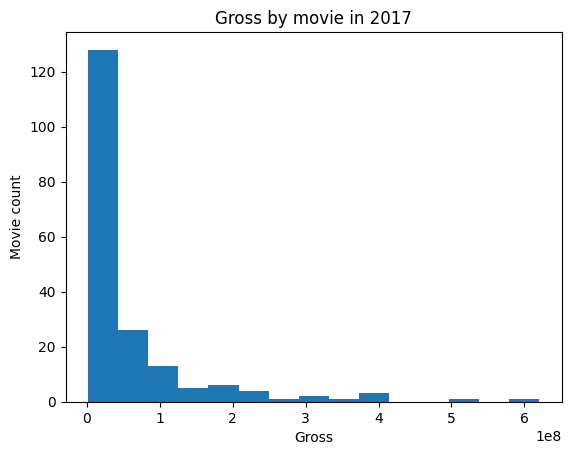

The average earnings of the year 2017 is 56294803.27 dollars
The percentage of movies from the year 2017 with earnings lower than the average is 73.96 %
The movie Star Wars Ep. VIII: The Last Jedi has the most earnings with 620181382.0 dollars


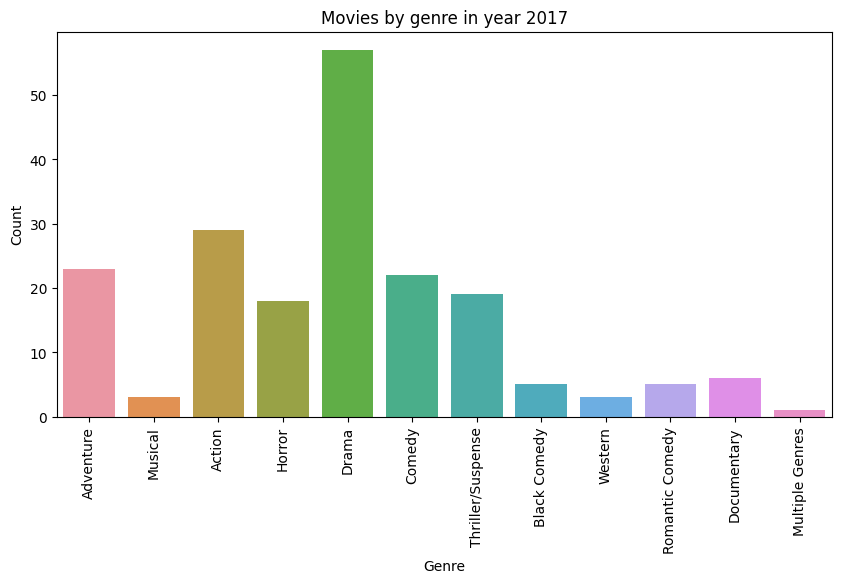

Genero
Drama                57
Action               29
Adventure            23
Comedy               22
Thriller/Suspense    19
Horror               18
Documentary           6
Black Comedy          5
Romantic Comedy       5
Musical               3
Western               3
Multiple Genres       1
Name: count, dtype: int64


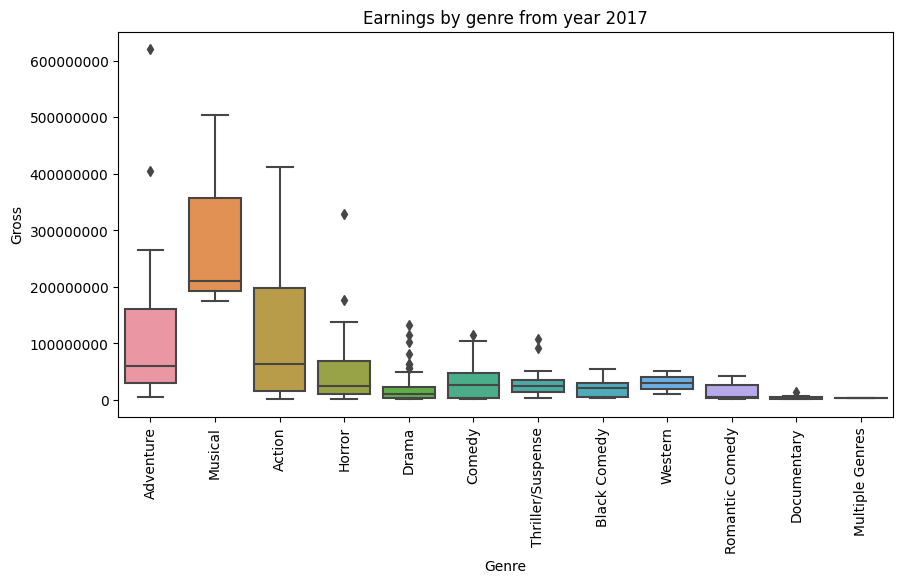

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             3.230403e+09  1.153715e+08
Adventure          2.627057e+09  1.142199e+08
Black Comedy       1.154302e+08  2.308605e+07
Comedy             7.700712e+08  3.500323e+07
Documentary        3.162192e+07  5.270320e+06
Drama              1.255153e+09  2.202022e+07
Horror             1.054702e+09  5.859457e+07
Multiple Genres    2.835355e+06  2.835355e+06
Musical            8.888144e+08  2.962715e+08
Romantic Comedy    8.129983e+07  1.625997e+07
Thriller/Suspense  6.011362e+08  3.163875e+07
Western            9.116377e+07  3.038792e+07

Genre with the highest earnings:
Action
Total earnings: 3230402548.67 dls.


In [25]:
index2017 = pd.read_csv('updated_data/index2017.csv')    
max_gen2017 =year(index2017,2017)

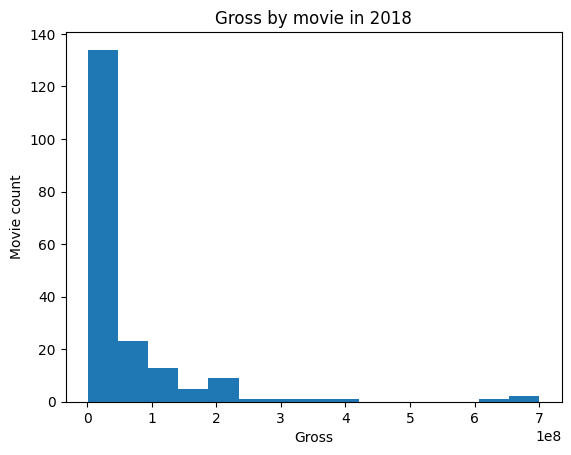

The average earnings of the year 2018 is 58671906.28 dollars
The percentage of movies from the year 2018 with earnings lower than the average is 74.61 %
The movie Black Panther has the most earnings with 700059566.0 dollars


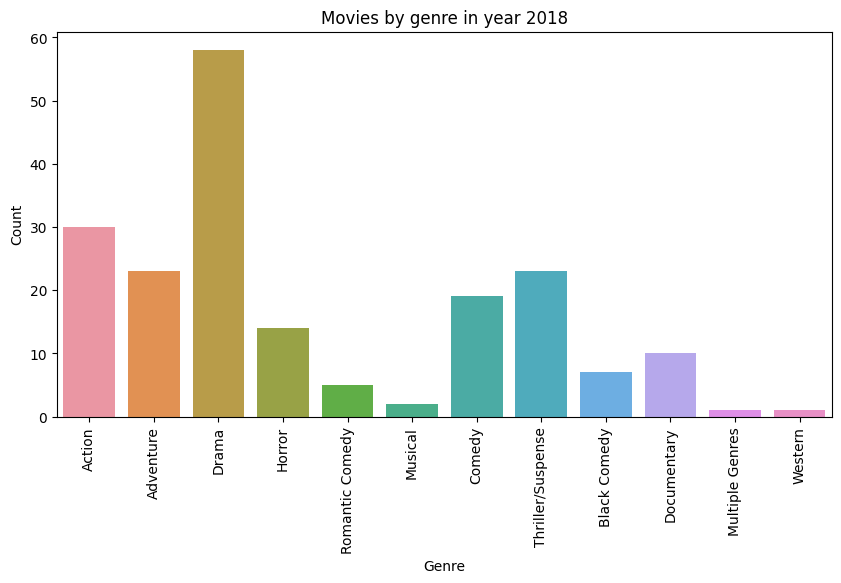

Genero
Drama                58
Action               30
Adventure            23
Thriller/Suspense    23
Comedy               19
Horror               14
Documentary          10
Black Comedy          7
Romantic Comedy       5
Musical               2
Multiple Genres       1
Western               1
Name: count, dtype: int64


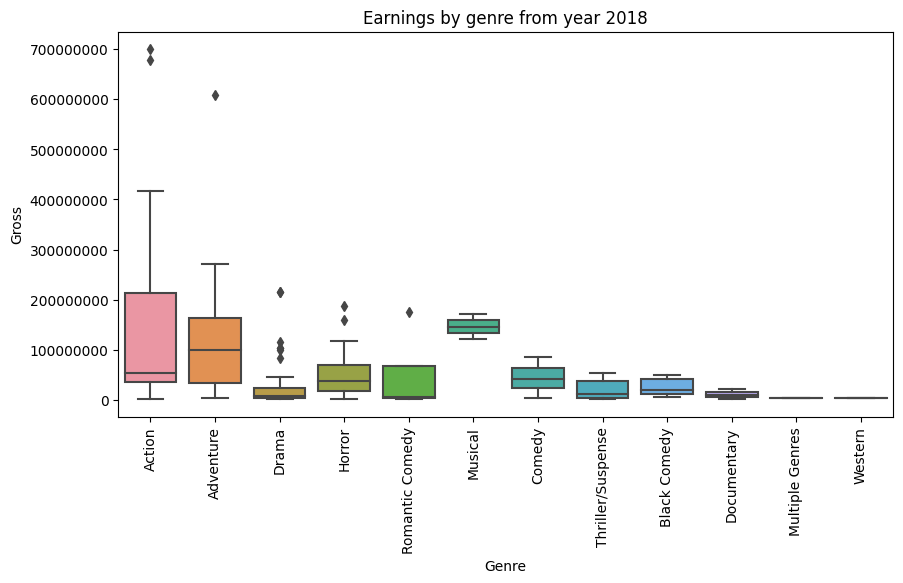

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             3.986608e+09  1.423788e+08
Adventure          2.761295e+09  1.200563e+08
Black Comedy       1.826957e+08  2.609938e+07
Comedy             8.087702e+08  4.256685e+07
Documentary        1.098199e+08  1.098199e+07
Drama              1.550582e+09  2.673417e+07
Horror             8.102919e+08  5.787799e+07
Multiple Genres    3.508777e+06  3.508777e+06
Musical            2.925934e+08  1.462967e+08
Romantic Comedy    2.561369e+08  5.122739e+07
Thriller/Suspense  4.408899e+08  1.916912e+07
Western            3.143056e+06  3.143056e+06

Genre with the highest earnings:
Action
Total earnings: 3986607611.00 dls.


In [26]:
index2018 = pd.read_csv('updated_data/index2018.csv')    
max_gen2018 =year(index2018,2018)

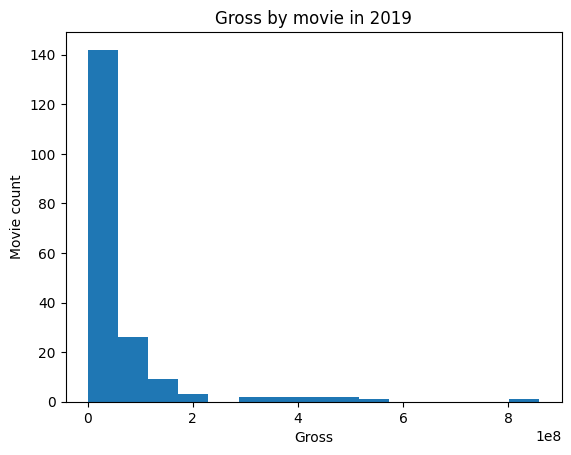

The average earnings of the year 2019 is 59035440.89 dollars
The percentage of movies from the year 2019 with earnings lower than the average is 74.74 %
The movie Avengers: Endgame has the most earnings with 858373000.0 dollars


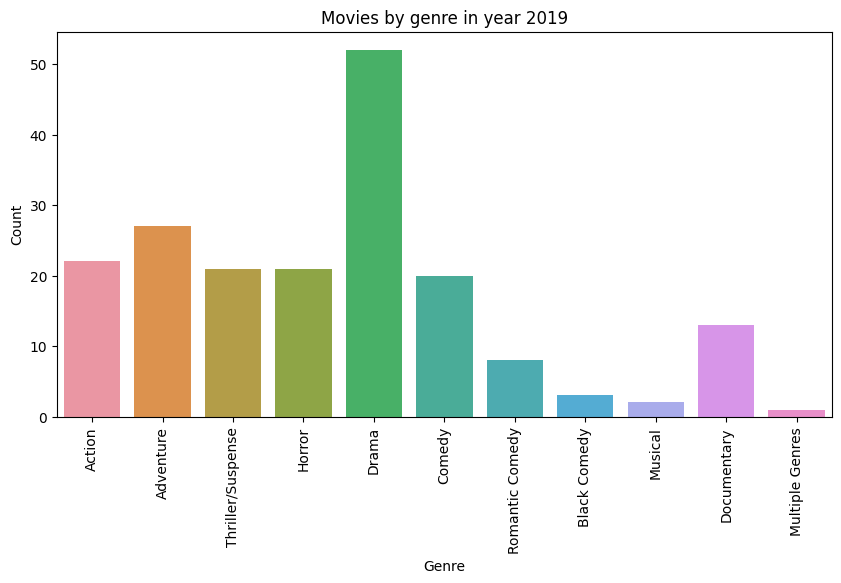

Genero
Drama                52
Adventure            27
Action               22
Thriller/Suspense    21
Horror               21
Comedy               20
Documentary          13
Romantic Comedy       8
Black Comedy          3
Musical               2
Multiple Genres       1
Name: count, dtype: int64


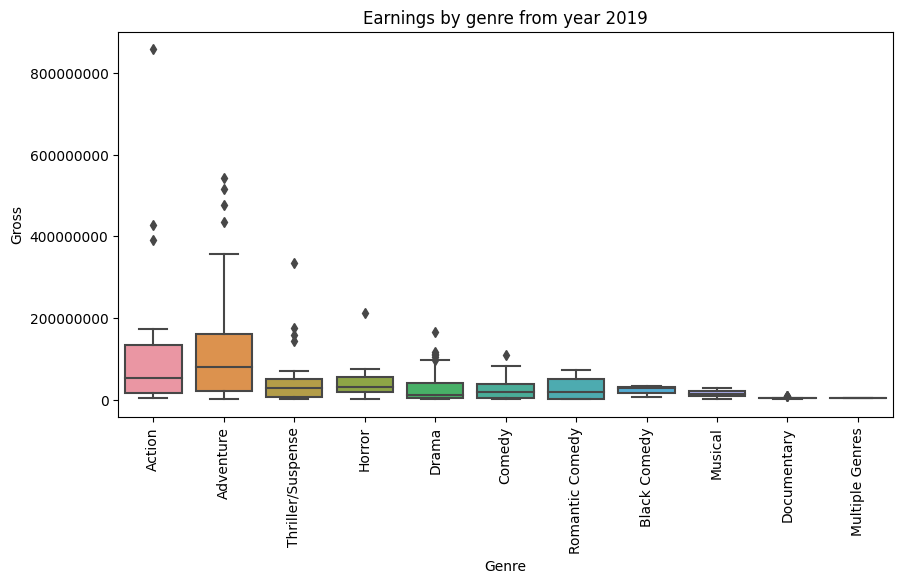

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.733840e+09  1.242655e+08
Adventure          3.984278e+09  1.475658e+08
Black Comedy       6.742198e+07  2.247399e+07
Comedy             5.721621e+08  2.860810e+07
Documentary        5.881854e+07  4.524503e+06
Drama              1.497291e+09  2.879405e+07
Horror             8.646289e+08  4.117280e+07
Multiple Genres    3.531093e+06  3.531093e+06
Musical            2.882556e+07  1.441278e+07
Romantic Comedy    2.195183e+08  2.743979e+07
Thriller/Suspense  1.186419e+09  5.649612e+07

Genre with the highest earnings:
Adventure
Total earnings: 3984277604.67 dls.


In [27]:
index2019 = pd.read_csv('updated_data/index2019.csv')    
max_gen2019 =year(index2019,2019)

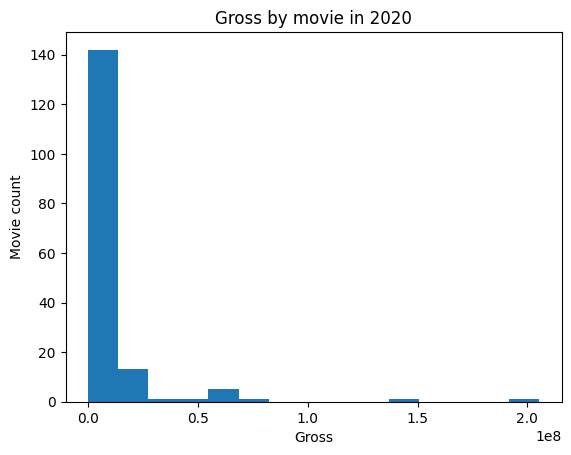

The average earnings of the year 2020 is 7861480.23 dollars
The percentage of movies from the year 2020 with earnings lower than the average is 78.79 %
The movie Bad Boys For Life has the most earnings with 205361549.5 dollars


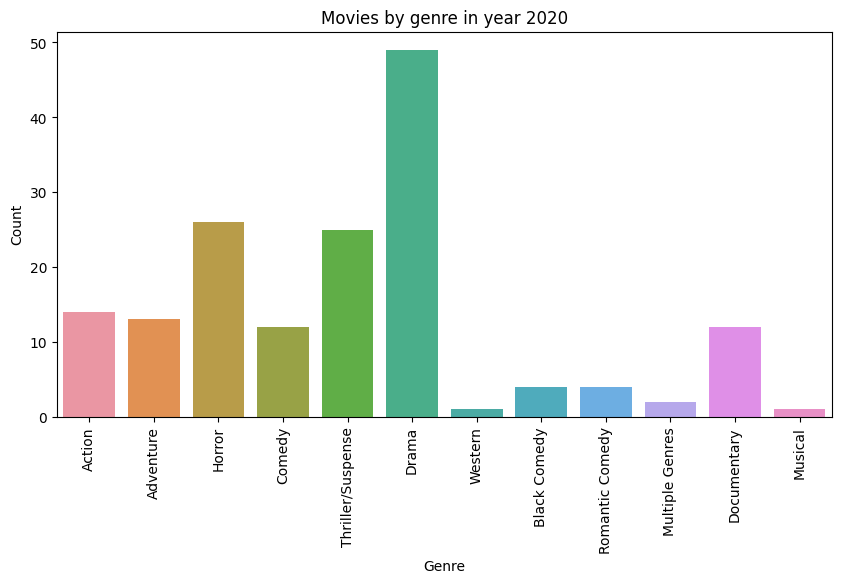

Genero
Drama                49
Horror               26
Thriller/Suspense    25
Action               14
Adventure            13
Comedy               12
Documentary          12
Black Comedy          4
Romantic Comedy       4
Multiple Genres       2
Western               1
Musical               1
Name: count, dtype: int64


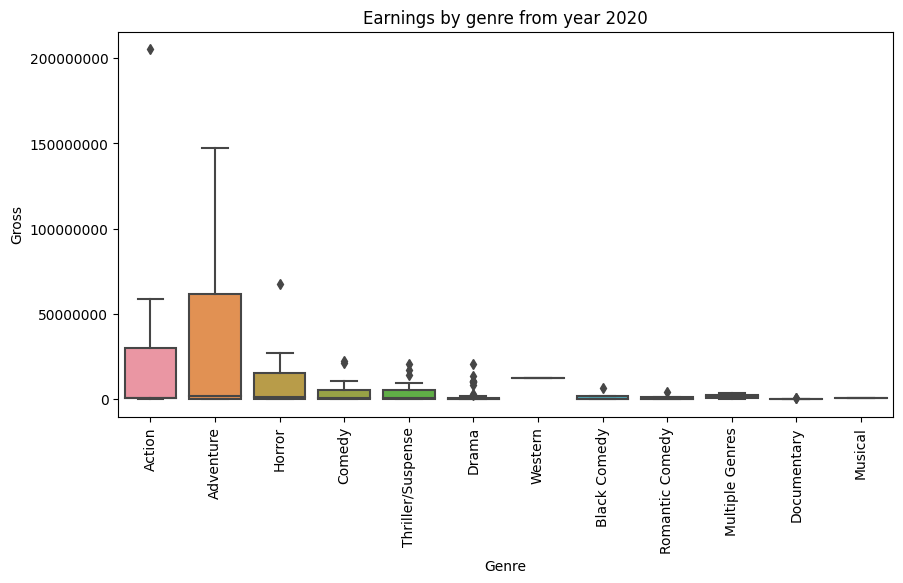

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             3.630883e+08  2.593488e+07
Adventure          4.149773e+08  3.192133e+07
Black Comedy       6.950587e+06  1.737647e+06
Comedy             6.156046e+07  5.130038e+06
Documentary        1.484712e+06  1.237260e+05
Drama              1.013866e+08  2.069115e+06
Horror             2.331835e+08  8.968595e+06
Multiple Genres    3.432023e+06  1.716012e+06
Musical            5.022520e+05  5.022520e+05
Romantic Comedy    4.240237e+06  1.060059e+06
Thriller/Suspense  9.165692e+07  3.666277e+06
Western            1.266832e+07  1.266832e+07

Genre with the highest earnings:
Adventure
Total earnings: 414977335.50 dls.


In [28]:
index2020 = pd.read_csv('updated_data/index2020.csv')    
max_gen2020 =year(index2020,2020)

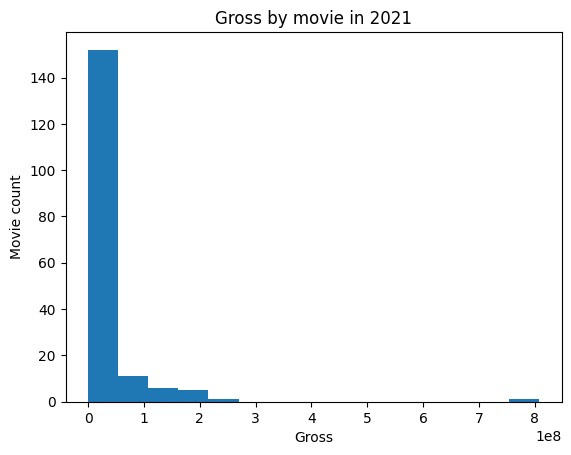

The average earnings of the year 2021 is 26696029.25 dollars
The percentage of movies from the year 2021 with earnings lower than the average is 76.4 %
The movie Spider-Man: No Way Home has the most earnings with 807885511.6666666 dollars


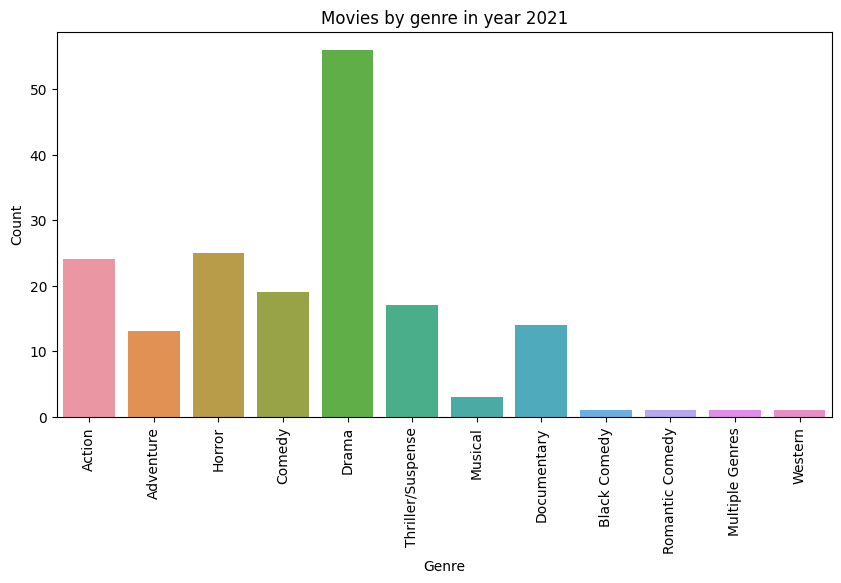

Genero
Drama                56
Horror               25
Action               24
Comedy               19
Thriller/Suspense    17
Documentary          14
Adventure            13
Musical               3
Black Comedy          1
Romantic Comedy       1
Multiple Genres       1
Western               1
Name: count, dtype: int64


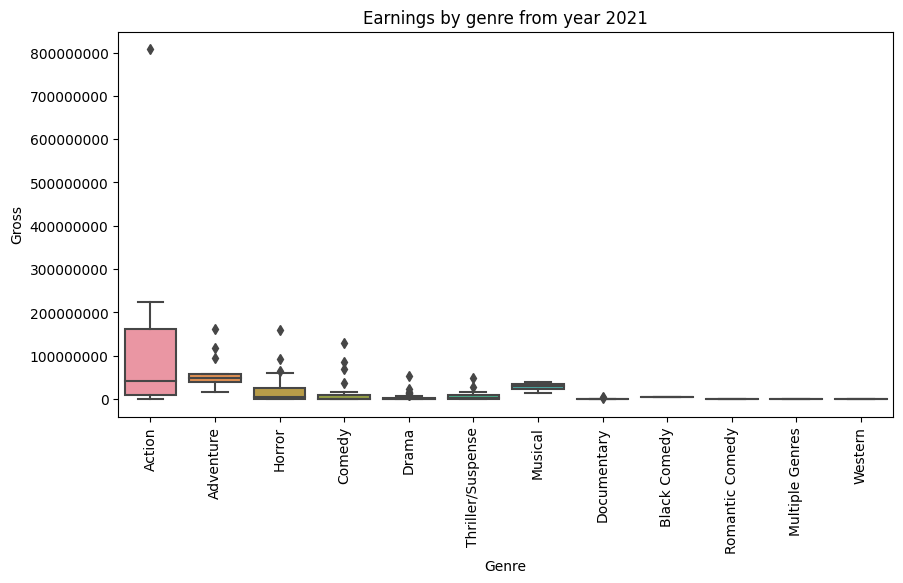

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             2.503270e+09  1.088378e+08
Adventure          7.783965e+08  5.987666e+07
Black Comedy       4.844399e+06  4.844399e+06
Comedy             3.521589e+08  1.853468e+07
Documentary        1.301587e+07  9.297049e+05
Drama              2.348060e+08  4.269201e+06
Horror             5.714191e+08  2.285676e+07
Multiple Genres    4.430500e+05  4.430500e+05
Musical            8.350814e+07  2.783604e+07
Romantic Comedy    1.018532e+06  1.018532e+06
Thriller/Suspense  1.405681e+08  8.268710e+06
Western            1.392210e+05  1.392210e+05

Genre with the highest earnings:
Action
Total earnings: 2503270496.33 dls.


In [29]:
index2021 = pd.read_csv('updated_data/index2021.csv')    
max_gen2021 =year(index2021,2021)

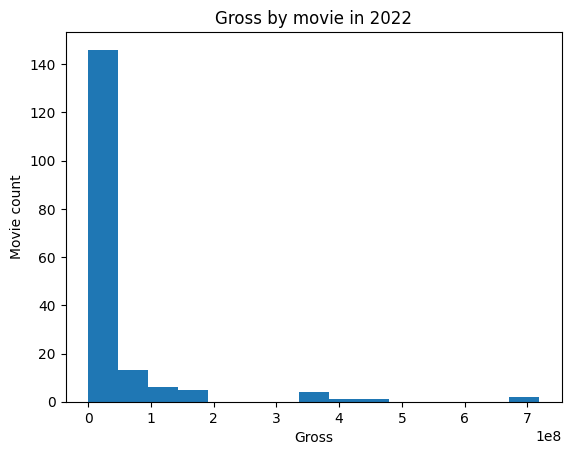

The average earnings of the year 2022 is 40959418.17 dollars
The percentage of movies from the year 2022 with earnings lower than the average is 79.78 %
The movie Top Gun: Maverick has the most earnings with 718732821.0 dollars


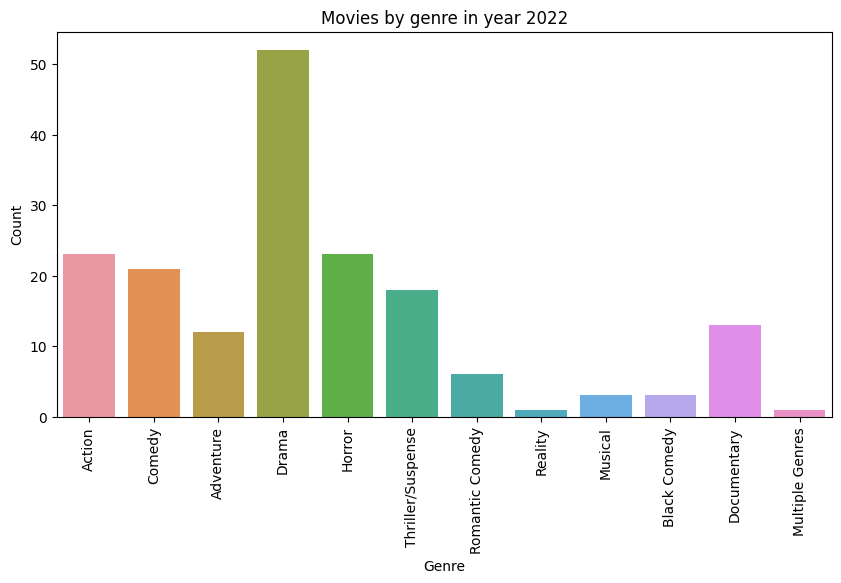

Genero
Drama                52
Action               23
Horror               23
Comedy               21
Thriller/Suspense    18
Documentary          13
Adventure            12
Romantic Comedy       6
Musical               3
Black Comedy          3
Reality               1
Multiple Genres       1
Name: count, dtype: int64


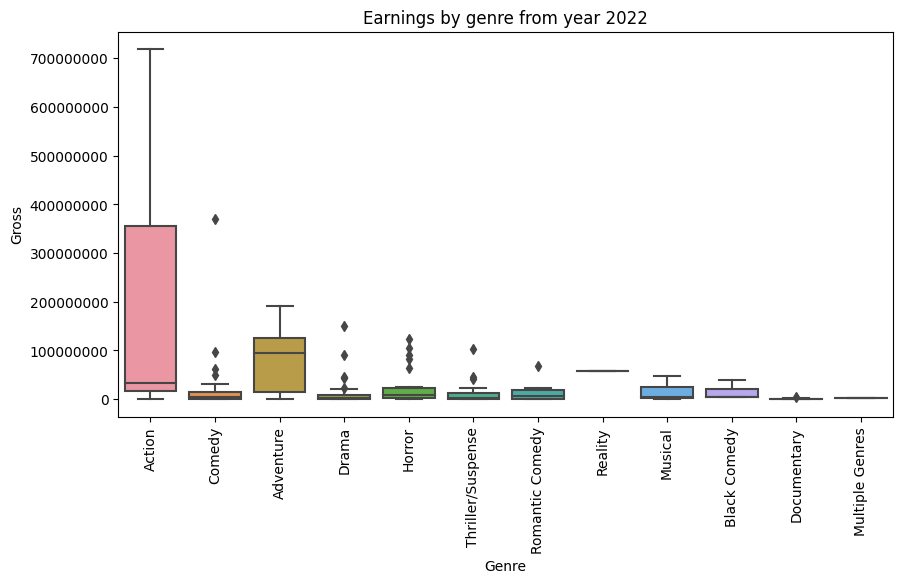

Summary of earnings by genre:
                            sum          mean
Genero                                       
Action             3.915002e+09  1.702175e+08
Adventure          1.004040e+09  8.367003e+07
Black Comedy       4.743994e+07  1.581331e+07
Comedy             6.762734e+08  3.220349e+07
Documentary        1.102256e+07  8.478895e+05
Drama              5.751128e+08  1.105986e+07
Horror             5.911391e+08  2.570170e+07
Multiple Genres    1.801646e+06  1.801646e+06
Musical            5.111312e+07  1.703771e+07
Reality            5.774345e+07  5.774345e+07
Romantic Comedy    1.047112e+08  1.745186e+07
Thriller/Suspense  2.535250e+08  1.408472e+07

Genre with the highest earnings:
Action
Total earnings: 3915002118.67 dls.


In [30]:
index2022 = pd.read_csv('updated_data/index2022.csv')    
max_gen2022 =year(index2022,2022)

Por último creo un nuevo data frame que contiene los géneros que obtuvieron mayores ganancias por año y se grafican 

In [31]:
resume_table.at[0,'Genre'] = max_gen2000[0]
resume_table.at[1,'Genre'] = max_gen2001[0]
resume_table.at[2,'Genre'] = max_gen2002[0]
resume_table.at[3,'Genre'] = max_gen2003[0]
resume_table.at[4,'Genre'] = max_gen2004[0]
resume_table.at[5,'Genre'] = max_gen2005[0]
resume_table.at[6,'Genre'] = max_gen2006[0]
resume_table.at[7,'Genre'] = max_gen2007[0]
resume_table.at[8,'Genre'] = max_gen2008[0]
resume_table.at[9,'Genre'] = max_gen2009[0]
resume_table.at[10,'Genre'] = max_gen2010[0]
resume_table.at[11,'Genre'] = max_gen2011[0]
resume_table.at[12,'Genre'] = max_gen2012[0]
resume_table.at[13,'Genre'] = max_gen2013[0]
resume_table.at[14,'Genre'] = max_gen2014[0]
resume_table.at[15,'Genre'] = max_gen2015[0]
resume_table.at[16,'Genre'] = max_gen2016[0]
resume_table.at[17,'Genre'] = max_gen2017[0]
resume_table.at[18,'Genre'] = max_gen2018[0]
resume_table.at[19,'Genre'] = max_gen2019[0]
resume_table.at[20,'Genre'] = max_gen2020[0]
resume_table.at[21,'Genre'] = max_gen2021[0]
resume_table.at[22,'Genre'] = max_gen2022[0]
resume_table.at[0,'Total Genre Gross'] = max_gen2000[1]
resume_table.at[1,'Total Genre Gross'] = max_gen2001[1]
resume_table.at[2,'Total Genre Gross'] = max_gen2002[1]
resume_table.at[3,'Total Genre Gross'] = max_gen2003[1]
resume_table.at[4,'Total Genre Gross'] = max_gen2004[1]
resume_table.at[5,'Total Genre Gross'] = max_gen2005[1]
resume_table.at[6,'Total Genre Gross'] = max_gen2006[1]
resume_table.at[7,'Total Genre Gross'] = max_gen2007[1]
resume_table.at[8,'Total Genre Gross'] = max_gen2008[1]
resume_table.at[9,'Total Genre Gross'] = max_gen2009[1]
resume_table.at[10,'Total Genre Gross'] = max_gen2010[1]
resume_table.at[11,'Total Genre Gross'] = max_gen2011[1]
resume_table.at[12,'Total Genre Gross'] = max_gen2012[1]
resume_table.at[13,'Total Genre Gross'] = max_gen2013[1]
resume_table.at[14,'Total Genre Gross'] = max_gen2014[1]
resume_table.at[15,'Total Genre Gross'] = max_gen2015[1]
resume_table.at[16,'Total Genre Gross'] = max_gen2016[1]
resume_table.at[17,'Total Genre Gross'] = max_gen2017[1]
resume_table.at[18,'Total Genre Gross'] = max_gen2018[1]
resume_table.at[19,'Total Genre Gross'] = max_gen2019[1]
resume_table.at[20,'Total Genre Gross'] = max_gen2020[1]
resume_table.at[21,'Total Genre Gross'] = max_gen2021[1]
resume_table.at[22,'Total Genre Gross'] = max_gen2022[1]
for i in range(len(resume_table)):
    resume_table.at[i,'Year'] = str(2000+i)


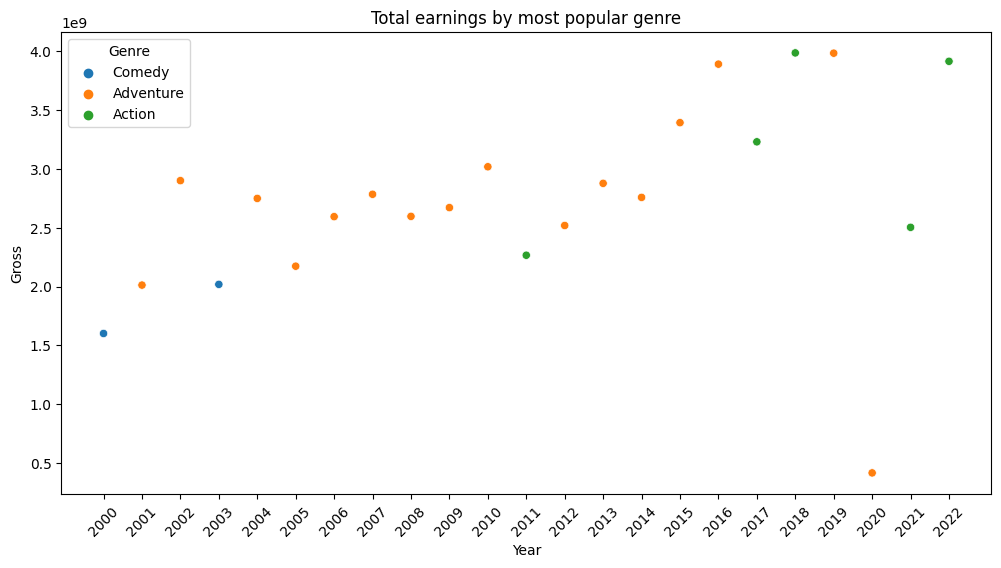

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Year', y='Total Genre Gross', hue='Genre', data=resume_table)
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Total earnings by most popular genre')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

In [33]:
popular = resume_table['Genre'].value_counts()/len(resume_table) * 100
print (popular)

Genre
Adventure    69.565217
Action       21.739130
Comedy        8.695652
Name: count, dtype: float64


De acuerdo con los datos anteriores podemos asegurar que el género mas exitoso de los ultimos veinte años ha sido Aventura con un 69.5%.

According to the previous data, we can conclude that the most successful genre of the last twenty years has been Adventure with a 69.5% share.

Finalmente guardo los datos de cada año en un solo data frame para exportarlos en archivo CSV junto con los datos de los géneros mas exitosos por año.

Finally, I consolidate the data from each year into a single data frame for export to a CSV file, along with the data on the most successful genres for each year.

In [34]:
general_data = pd.concat([index2000,index2001,index2002,index2003,index2004,index2005,index2006,index2007,index2008,index2009,index2010,index2011,index2012,index2013,index2014,index2015,index2016,index2017,index2018,index2019,index2020,index2021,index2022], ignore_index=True)
general_data = general_data.reset_index(drop=True)
general_data.to_csv('updated_data/indexGeneral.csv', index=False)
resume_table.to_csv('updated_data/resume_table.csv', index=False)